In [ ]:
pip uninstall googletrans googletrans-temp

In [ ]:
pip install googletrans

In [ ]:
pip install git+https://github.com/BoseCorp/py-googletrans.git --upgrade

  Cloning https://github.com/BoseCorp/py-googletrans.git to /tmp/pip-req-build-a8zy4xd4
  Running command git clone -q https://github.com/BoseCorp/py-googletrans.git /tmp/pip-req-build-a8zy4xd4
  Created wheel for googletrans: filename=googletrans-2.3.0-cp36-none-any.whl size=16447 sha256=1233050226590fe3bce1c9e633b1aa20bde3db9fa61f90efcadd0e81cdccc275
  Stored in directory: /tmp/pip-ephem-wheel-cache-_1qz_rpq/wheels/6a/fc/9e/2d31d95d9e97da5166afd8225a6f3b6850dc2c6e84accefbfc
Successfully built googletrans


In [ ]:
pip install Sastrawi

     |████████████████████████████████| 215kB 9.8MB/s 


In [1]:
import pandas as pd
import numpy as np
import math
import random
import re
import string  

import matplotlib.pyplot as plt
import seaborn as sns 

import nltk

from sklearn.feature_extraction.text import CountVectorizer

# **Data Analysis**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read Dataset

In [ ]:
df = pd.read_csv("drive/My Drive/TA/before_preprocessing.csv")
df_trans_id = pd.read_csv("drive/My Drive/TA/before_preprocessing_id.csv", encoding= 'unicode_escape')
df_trans_en_id = pd.read_csv("drive/My Drive/TA/before_preprocessing_en_id.csv", encoding= 'unicode_escape')

In [ ]:
df.head()

review_id                                        review_text  ...  product  aroma
0        708  sunscreen termahal yang pernah gue beli ini ka...  ...        1      0
1        838  ini enak banget dipakainya, enteng banget diwa...  ...        1      0
2       1166  the description is quite right. produk ini ema...  ...        1      1
3       1374  bisa untuk wajah dan badan dengan harga yang s...  ...        1      0
4       1421  saya beli produk ini karena suka banget wangin...  ...        0      1

[5 rows x 6 columns]

In [ ]:
df_trans_id.head()

review_id                                        review_text  ...  product  aroma
0      708.0  tabir surya termahal yang pernah gue beli ini ...  ...        1      0
1      838.0  ini enak banget dipakainya, enteng banget diwa...  ...        1      0
2     1166.0  uraiannya cukup tepat. produk ini emang cocok ...  ...        1      1
3     1374.0  bisa untuk wajah dan badan dengan harga yang s...  ...        1      0
4     1421.0  saya beli produk ini karena suka banget wangin...  ...        0      1

[5 rows x 6 columns]

In [ ]:
df_trans_en_id.head()

review_id                                        review_text  ...  product  aroma
0       708  Tabir surya termahal yang pernah saya beli itu...  ...        1      0
1       838  ini sangat bagus untuk dipakai, sangat ringan ...  ...        1      0
2      1166  uraiannya cukup tepat. produk ini sangat cocok...  ...        1      1
3      1374  bisa digunakan untuk wajah dan badan dengan ha...  ...        1      0
4      1421  Saya membeli produk ini karena saya sangat suk...  ...        0      1

[5 rows x 6 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    5054 non-null   int64 
 1   review_text  5054 non-null   object
 2   price        5054 non-null   int64 
 3   packaging    5054 non-null   int64 
 4   product      5054 non-null   int64 
 5   aroma        5054 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 237.0+ KB


In [ ]:
df_trans_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    5054 non-null   float64
 1   review_text  5054 non-null   object 
 2   price        5054 non-null   int64  
 3   packaging    5054 non-null   int64  
 4   product      5054 non-null   int64  
 5   aroma        5054 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 237.0+ KB


In [ ]:
df_trans_en_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    5054 non-null   object
 1   review_text  5054 non-null   object
 2   price        5054 non-null   int64 
 3   packaging    5054 non-null   int64 
 4   product      5054 non-null   int64 
 5   aroma        5054 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 237.0+ KB


In [ ]:
df.dropna(inplace=True)
df_trans_id.dropna(inplace=True)
df_trans_en_id.dropna(inplace=True)

## Data Distribution

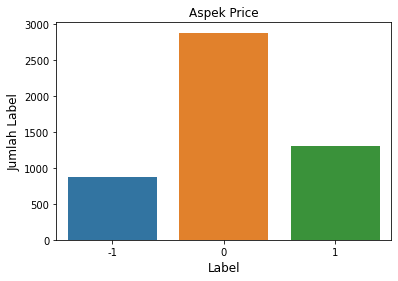

In [ ]:
sns.countplot(x='price', data=df)
    
plt.title('Aspek Price')
plt.ylabel('Jumlah Label', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.show()

In [ ]:
#Hitung jumlah label 
price = df.groupby(['price'])['price'].count()
price

price
-1     868
 0    2880
 1    1306
Name: price, dtype: int64

Text(0.5, 0, 'Label')

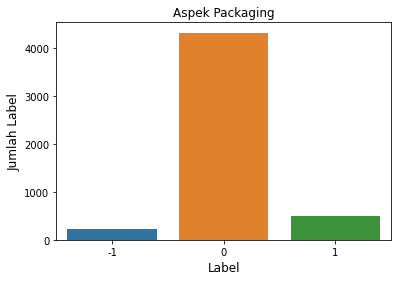

In [ ]:
sns.countplot(x='packaging', data=df)
plt.title('Aspek Packaging')
plt.ylabel('Jumlah Label', fontsize=12)
plt.xlabel('Label', fontsize=12)

In [ ]:
#Hitung jumlah label 
packaging = df.groupby(['packaging'])['packaging'].count()
packaging

packaging
-1     226
 0    4322
 1     506
Name: packaging, dtype: int64

Text(0.5, 0, 'Label')

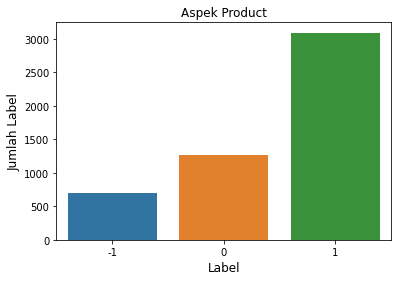

In [ ]:
sns.countplot(x='product', data=df)
plt.title('Aspek Product')
plt.ylabel('Jumlah Label', fontsize=12)
plt.xlabel('Label', fontsize=12)

In [ ]:
#Hitung label 
product = df.groupby(['product'])['product'].count()
product

product
-1     698
 0    1264
 1    3092
Name: product, dtype: int64

Text(0.5, 0, 'Label')

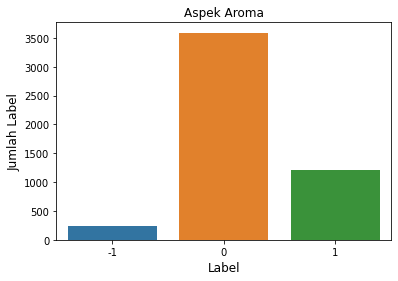

In [ ]:
sns.countplot(x='aroma', data=df)
plt.title('Aspek Aroma')
plt.ylabel('Jumlah Label', fontsize=12)
plt.xlabel('Label', fontsize=12)

In [ ]:
#Hitung label 
aroma = df.groupby(['aroma'])['aroma'].count()
aroma

aroma
-1     247
 0    3589
 1    1218
Name: aroma, dtype: int64

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

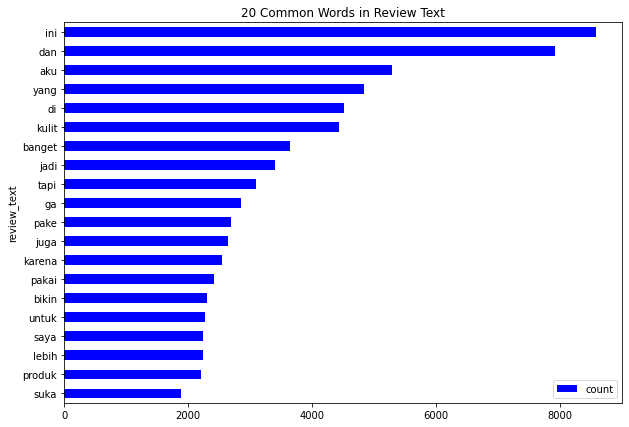

In [ ]:
common_words_ = get_top_n_words(df['review_text'], 20)
top_word = pd.DataFrame(common_words_, columns = ['review_text' , 'count'])
fig, ax = plt.subplots(figsize=(10, 7))

# Plot horizontal bar graph
top_word.sort_values(by='count').plot(kind ='barh', x ='review_text', y ='count', ax = ax, color="blue")
ax.set_title("20 Common Words in Review Text")
plt.show()

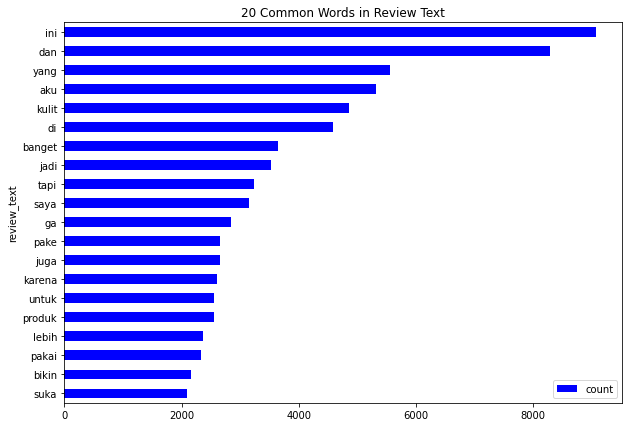

In [ ]:
common_words_ = get_top_n_words(df_trans_id['review_text'], 20)
top_word = pd.DataFrame(common_words_, columns = ['review_text' , 'count'])
fig, ax = plt.subplots(figsize=(10, 7))

# Plot horizontal bar graph
top_word.sort_values(by='count').plot(kind ='barh', x ='review_text', y ='count', ax = ax, color="blue")
ax.set_title("20 Common Words in Review Text")
plt.show()

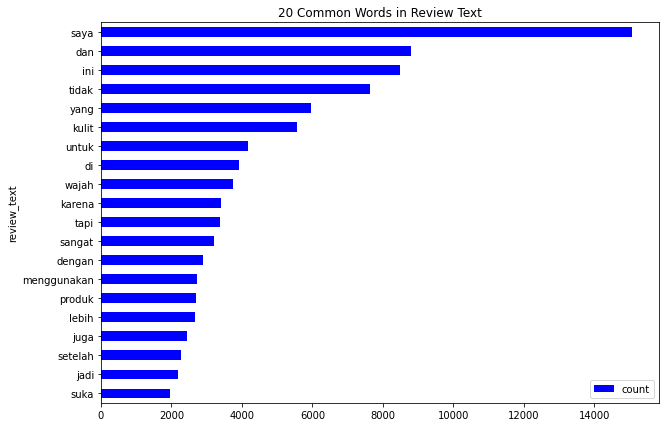

In [ ]:
common_words_ = get_top_n_words(df_trans_en_id['review_text'], 20)
top_word = pd.DataFrame(common_words_, columns = ['review_text' , 'count'])
fig, ax = plt.subplots(figsize=(10, 7))

# Plot horizontal bar graph
top_word.sort_values(by='count').plot(kind ='barh', x ='review_text', y ='count', ax = ax, color="blue")
ax.set_title("20 Common Words in Review Text")
plt.show()

## Split Data Train (80%) & Data Test (20%)

In [ ]:
from sklearn.model_selection import train_test_split

def splitTrainTest(df):
    X_train, X_test, y_train, y_test = train_test_split(df['review_text'], df[['price','packaging','product','aroma']], test_size = 0.2, random_state = 9)

    data_train = y_train.copy() 
    data_train = data_train.join(X_train)

    data_test = y_test.copy() 
    data_test = data_test.join(X_test)

    return data_train, data_test

In [ ]:
data_train, data_test = splitTrainTest(df)
data_train_trans_id, data_test_trans_id = splitTrainTest(df_trans_id)
data_train_trans_en_id, data_test_trans_en_id = splitTrainTest(df_trans_en_id)

In [ ]:
data_train.head()

price  ...                                        review_text
74        0  ...  love it so much! awalnha aku bukan orang yg su...
106       0  ...  di kulitku yang kombinasi, sunscreen ini enak ...
2302      0  ...  pacakginya gedee banget,,,ga travel friendly s...
1760      0  ...  wonder pore ini lumayan agak ngefek sih di aku...
2266     -1  ...  kalo saya bilang mahal ya karena ga sesuai sam...

[5 rows x 5 columns]

In [ ]:
data_train_trans_id.head()

price  ...                                        review_text
74        0  ...  sangat menyukainya! awalnha aku bukan orang yg...
106       0  ...  di kulitku yang kombinasi, sunscreen ini enak ...
2302      0  ...  pacakginya gedee banget ,,, ga travel friendly...
1760      0  ...  wonder pore ini lumayan agak ngefek sih di aku...
2266     -1  ...  kalo saya bilang mahal ya karena ga sesuai sam...

[5 rows x 5 columns]

In [ ]:
data_train_trans_en_id.head()

price  ...                                        review_text
74        0  ...  sangat menyukainya! Awalnya saya bukanlah oran...
106       0  ...  Pada kulit kombinasi saya, tabir surya ini san...
2302      0  ...  pacakgnya benar-benar gedee ,,, tidak ramah pe...
1760      0  ...  Pori ajaib ini benar-benar mempengaruhi saya, ...
2266     -1  ...  kalau saya bilang mahal karena tidak cocok den...

[5 rows x 5 columns]

In [ ]:
print('Jumlah Data Train :', len(data_train))
print('Price : ', data_train.groupby(['price'])['price'].count())
print('Packaging : ', data_train.groupby(['packaging'])['packaging'].count())
print('Product : ', data_train.groupby(['product'])['product'].count())
print('Aroma : ', data_train.groupby(['aroma'])['aroma'].count())

Jumlah Data Train : 4043
Price :  price
-1     691
 0    2300
 1    1052
Name: price, dtype: int64
Packaging :  packaging
-1     174
 0    3462
 1     407
Name: packaging, dtype: int64
Product :  product
-1     569
 0    1019
 1    2455
Name: product, dtype: int64
Aroma :  aroma
-1     205
 0    2860
 1     978
Name: aroma, dtype: int64


In [ ]:
data_test.head()

price  ...                                        review_text
1144      1  ...  dari semua smlc yang saya punya warna ini yang...
2704      0  ...  sudah tau brand ini sejak lama krn suka banget...
4761      0  ...  warnanya menarik dan rasanya enak. edible but ...
1494      1  ...  murah, dan nyegerin. suka kalo ada barang mura...
995       1  ...  my first colourpop lipstick :) dan puas banget...

[5 rows x 5 columns]

In [ ]:
data_test_trans_id.head()

price  ...                                        review_text
1144      1  ...  dari semua smlc yang saya punya warna ini yang...
2704      0  ...  sudah tau brand ini sejak lama krn suka banget...
4761      0  ...  warnanya menarik dan rasanya enak. bisa dimaka...
1494      1  ...  murah, dan nyegerin. suka kalo ada barang mura...
995       1  ...  my first colourpop lipstick :) dan puas banget...

[5 rows x 5 columns]

In [ ]:
data_test_trans_en_id.head()

price  ...                                        review_text
1144      1  ...  dari semua smlc ini saya punya warna yang pali...
2704      0  ...  Brand ini sudah lama saya kenal karena saya sa...
4761      0  ...  warna yang menarik dan rasa yang enak. bisa di...
1494      1  ...  murah, dan bagus. suka kalau ada yang murah ta...
995       1  ...  lipstik colourpop pertama saya :) dan saya san...

[5 rows x 5 columns]

In [ ]:
print('Jumlah Data Test :', len(data_test))
print('Price : ', data_test.groupby(['price'])['price'].count())
print('Packaging : ', data_test.groupby(['packaging'])['packaging'].count())
print('Product : ', data_test.groupby(['product'])['product'].count())
print('Aroma : ', data_test.groupby(['aroma'])['aroma'].count())

Jumlah Data Test : 1011
Price :  price
-1    177
 0    580
 1    254
Name: price, dtype: int64
Packaging :  packaging
-1     52
 0    860
 1     99
Name: packaging, dtype: int64
Product :  product
-1    129
 0    245
 1    637
Name: product, dtype: int64
Aroma :  aroma
-1     42
 0    729
 1    240
Name: aroma, dtype: int64


In [ ]:
#Save Data Train & Data Test

# data_train.to_csv("drive/My Drive/TA/data_train.csv")
# data_test.to_csv("drive/My Drive/TA/data_test.csv")

# data_train_trans_id.to_csv("drive/My Drive/TA/data_train_trans_id.csv")
# data_test_trans_id.to_csv("drive/My Drive/TA/data_test_trans_id.csv")

# data_train_trans_en_id.to_csv("drive/My Drive/TA/data_train_trans_en_id.csv")
# data_test_trans_en_id.to_csv("drive/My Drive/TA/data_test_trans_en_id.csv")

# **PreProcessing**

## Read Data Train & Data Test

In [ ]:
# Read Data Train & Data Test

data_train = pd.read_csv("drive/My Drive/TA/data_train.csv")
data_train = data_train.drop(columns=['Unnamed: 0'])
data_test = pd.read_csv("drive/My Drive/TA/data_test.csv")
data_test = data_test.drop(columns=['Unnamed: 0'])

data_train_trans_id = pd.read_csv("drive/My Drive/TA/data_train_trans_id.csv")
data_train_trans_id = data_train_trans_id.drop(columns=['Unnamed: 0'])
data_test_trans_id = pd.read_csv("drive/My Drive/TA/data_test_trans_id.csv")
data_test_trans_id = data_test_trans_id.drop(columns=['Unnamed: 0'])

data_train_trans_en_id = pd.read_csv("drive/My Drive/TA/data_train_trans_en_id.csv")
data_train_trans_en_id = data_train_trans_en_id.drop(columns=['Unnamed: 0'])
data_test_trans_en_id = pd.read_csv("drive/My Drive/TA/data_test_trans_en_id.csv")
data_test_trans_en_id = data_test_trans_en_id.drop(columns=['Unnamed: 0'])

In [ ]:
data_train.head()

price  packaging  ...  aroma                                        review_text
0      0          0  ...      1  love it so much! awalnha aku bukan orang yg su...
1      0          1  ...      0  di kulitku yang kombinasi, sunscreen ini enak ...
2      0         -1  ...      0  pacakginya gedee banget,,,ga travel friendly s...
3      0          0  ...      0  wonder pore ini lumayan agak ngefek sih di aku...
4     -1          0  ...      0  kalo saya bilang mahal ya karena ga sesuai sam...

[5 rows x 5 columns]

In [ ]:
data_train_trans_id.head()

price  packaging  ...  aroma                                        review_text
0      0          0  ...      1  sangat menyukainya! awalnha aku bukan orang yg...
1      0          1  ...      0  di kulitku yang kombinasi, sunscreen ini enak ...
2      0         -1  ...      0  pacakginya gedee banget ,,, ga travel friendly...
3      0          0  ...      0  wonder pore ini lumayan agak ngefek sih di aku...
4     -1          0  ...      0  kalo saya bilang mahal ya karena ga sesuai sam...

[5 rows x 5 columns]

In [ ]:
data_train_trans_en_id.head()

price  packaging  ...  aroma                                        review_text
0      0          0  ...      1  sangat menyukainya! Awalnya saya bukanlah oran...
1      0          1  ...      0  Pada kulit kombinasi saya, tabir surya ini san...
2      0         -1  ...      0  pacakgnya benar-benar gedee ,,, tidak ramah pe...
3      0          0  ...      0  Pori ajaib ini benar-benar mempengaruhi saya, ...
4     -1          0  ...      0  kalau saya bilang mahal karena tidak cocok den...

[5 rows x 5 columns]

In [ ]:
data_test.head()

price  packaging  ...  aroma                                        review_text
0      1          0  ...      1  dari semua smlc yang saya punya warna ini yang...
1      0          0  ...      0  sudah tau brand ini sejak lama krn suka banget...
2      0          0  ...      1  warnanya menarik dan rasanya enak. edible but ...
3      1         -1  ...      0  murah, dan nyegerin. suka kalo ada barang mura...
4      1          0  ...      0  my first colourpop lipstick :) dan puas banget...

[5 rows x 5 columns]

In [ ]:
data_test_trans_id.head()

price  packaging  ...  aroma                                        review_text
0      1          0  ...      1  dari semua smlc yang saya punya warna ini yang...
1      0          0  ...      0  sudah tau brand ini sejak lama krn suka banget...
2      0          0  ...      1  warnanya menarik dan rasanya enak. bisa dimaka...
3      1         -1  ...      0  murah, dan nyegerin. suka kalo ada barang mura...
4      1          0  ...      0  my first colourpop lipstick :) dan puas banget...

[5 rows x 5 columns]

In [ ]:
data_test_trans_en_id.head()

price  packaging  ...  aroma                                        review_text
0      1          0  ...      1  dari semua smlc ini saya punya warna yang pali...
1      0          0  ...      0  Brand ini sudah lama saya kenal karena saya sa...
2      0          0  ...      1  warna yang menarik dan rasa yang enak. bisa di...
3      1         -1  ...      0  murah, dan bagus. suka kalau ada yang murah ta...
4      1          0  ...      0  lipstik colourpop pertama saya :) dan saya san...

[5 rows x 5 columns]

## Punctuation Removal

Pengilangan simbol khusus seperti \r, \n, ", url, dan byte code

In [ ]:
def cleaning(df):    
    df = re.sub(r"\n", " ",df)
    df = re.sub(r"\r", " ",df)
    df = re.sub(r"&amp;", " ",df)
    df = re.sub(r"&gt;", " ",df)
    df = re.sub(r"&lt;", " ",df)
    df = re.sub(r"&quot;", " ",df)
    df = re.sub(r"\u00a0", " ",df) 
    df = re.sub(r'''(?i)\b((?:https|http?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', "",df)
    df = re.sub(r"'s","",df)
    df = re.sub(r"can't","can not",df)
    df = re.sub(r"ain't","am not",df)
    df = re.sub(r"won't","will not",df)
    df = re.sub(r"n't"," not",df)
    df = re.sub(r"'re"," are",df)    
    df = re.sub(r"[-_<>*#$@()\"/%&;:<>{}`+=~|.!?,']", " ", df) #hapus simbol
    df = re.sub(r"amp", " ",df)
    df = re.sub(r"gt", " ",df)
    df = re.sub(r"lt", " ",df)
    df = re.sub(r"quot", " ",df)
    df = re.sub(r"nbsp", " ",df)
    df = re.sub(r"apos", " ",df)
    df = re.sub(r"[^a-zA-Z]", " ",df) # menghilangkan angka
    df = re.sub("\s\s+", " ",df) # menghilangkan double spasi
    return df

In [ ]:
data_train['review_text1'] = data_train['review_text'].apply(cleaning)
data_train.head()

price  ...                                       review_text1
0      0  ...  love it so much awalnha aku bukan orang yg suk...
1      0  ...  di kulitku yang kombinasi sunscreen ini enak b...
2      0  ...  pacakginya gedee banget ga travel friendly sam...
3      0  ...  wonder pore ini lumayan agak ngefek sih di aku...
4     -1  ...  kalo saya bilang mahal ya karena ga sesuai sam...

[5 rows x 6 columns]

In [ ]:
data_train_trans_id['review_text1'] = data_train_trans_id['review_text'].apply(cleaning)
data_train_trans_id.head()

price  ...                                       review_text1
0      0  ...  sangat menyukainya awalnha aku bukan orang yg ...
1      0  ...  di kulitku yang kombinasi sunscreen ini enak b...
2      0  ...  pacakginya gedee banget ga travel friendly sam...
3      0  ...  wonder pore ini lumayan agak ngefek sih di aku...
4     -1  ...  kalo saya bilang mahal ya karena ga sesuai sam...

[5 rows x 6 columns]

In [ ]:
data_train_trans_en_id['review_text1'] = data_train_trans_en_id['review_text'].apply(cleaning)
data_train_trans_en_id.head()

price  ...                                       review_text1
0      0  ...  sangat menyukainya Awalnya saya bukanlah orang...
1      0  ...  Pada kulit kombinasi saya tabir surya ini sang...
2      0  ...  pacakgnya benar benar gedee tidak ramah perjal...
3      0  ...  Pori ajaib ini benar benar mempengaruhi saya s...
4     -1  ...  kalau saya bilang mahal karena tidak cocok den...

[5 rows x 6 columns]

In [ ]:
data_test['review_text1'] = data_test['review_text'].apply(cleaning)
data_test.head()

price  ...                                       review_text1
0      1  ...  dari semua smlc yang saya punya warna ini yang...
1      0  ...  sudah tau brand ini sejak lama krn suka banget...
2      0  ...  warnanya menarik dan rasanya enak edible but i...
3      1  ...  murah dan nyegerin suka kalo ada barang murah ...
4      1  ...  my first colourpop lipstick dan puas banget sa...

[5 rows x 6 columns]

In [ ]:
data_test_trans_id['review_text1'] = data_test_trans_id['review_text'].apply(cleaning)
data_test_trans_id.head()

price  ...                                       review_text1
0      1  ...  dari semua smlc yang saya punya warna ini yang...
1      0  ...  sudah tau brand ini sejak lama krn suka banget...
2      0  ...  warnanya menarik dan rasanya enak bisa dimakan...
3      1  ...  murah dan nyegerin suka kalo ada barang murah ...
4      1  ...  my first colourpop lipstick dan puas banget sa...

[5 rows x 6 columns]

In [ ]:
data_test_trans_en_id['review_text1'] = data_test_trans_en_id['review_text'].apply(cleaning)
data_test_trans_en_id.head()

price  ...                                       review_text1
0      1  ...  dari semua smlc ini saya punya warna yang pali...
1      0  ...  Brand ini sudah lama saya kenal karena saya sa...
2      0  ...  warna yang menarik dan rasa yang enak bisa dim...
3      1  ...  murah dan bagus suka kalau ada yang murah tapi...
4      1  ...  lipstik colourpop pertama saya dan saya sangat...

[5 rows x 6 columns]

## Translate

In [ ]:
# import googletrans
# from googletrans import Translator
# import time

In [ ]:
# train_trans = data_train.copy()
# test_trans = data_test.copy()

In [ ]:
# df1 = train_trans[0:100]
# df2 = train_trans[100:200]
# df3 = train_trans[200:300]
# df4 = train_trans[300:400]
# df5 = train_trans[400:500]
# df6 = train_trans[500:600]
# df7 = train_trans[600:700]
# df8 = train_trans[700:800]
# df9 = train_trans[800:900]
# df10 = train_trans[900:1000]
# df11 = train_trans[1000:1100]
# df12 = train_trans[1100:1200]
# df13 = train_trans[1200:1300]
# df14 = train_trans[1300:1400]
# df15 = train_trans[1400:1500]
# df16 = train_trans[1500:1600]
# df17 = train_trans[1600:1700]
# df18 = train_trans[1700:1800]
# df19 = train_trans[1800:1900]
# df20 = train_trans[1900:2000]
# df21 = train_trans[2000:2100]
# df22 = train_trans[2100:2200]
# df23 = train_trans[2200:2300]
# df24 = train_trans[2300:2400]
# df25 = train_trans[2400:2500]
# df26 = train_trans[2500:2600]
# df27 = train_trans[2600:2700]
# df28 = train_trans[2700:2800]
# df29 = train_trans[2800:2900]
# df30 = train_trans[2900:3000]
# df31 = train_trans[3000:4000]
# df32 = train_trans[4000:4042]
# dt1 = test_trans[0:100]
# dt2 = test_trans[100:200]
# dt3 = test_trans[200:300]
# dt4 = test_trans[300:400]
# dt5 = test_trans[400:500]
# dt6 = test_trans[500:600]
# dt7 = test_trans[600:700]
# dt8 = test_trans[700:800]
# dt9 = test_trans[800:900]
# dt10 = test_trans[900:1000]
# dt11 = test_trans[1000:1010]

In [ ]:
# def translateText(text):
#     translator = Translator()
#     text_trans = translator.translate(text, src = "en", dest = "id").text
#     time.sleep(2)
#     print("-",end="")
#     return str(text_trans)

# def translateData(data):
#     data['review_text2'] = data['review_text1'].map(lambda com : translateText(com))
#     return data

# def translateData(df):
#     translator = Translator()
#     df['review_text2'] = df['review_text1'].apply(translator.translate, src='en', dest='id').apply(getattr, args=('text',))
#     return df

In [ ]:
# df1 = translateData(df1)
# df2 = translateData(df2)
# df3 = translateData(df3)
# df4 = translateData(df4)
# df5 = translateData(df5)
# df6 = translateData(df6)

In [ ]:
# df7 = translateData(df7)
# df8 = translateData(df8)
# df9 = translateData(df9)
# df10 = translateData(df10)
# df11 = translateData(df11)

In [ ]:
# df12 = translateData(df12)
# df13 = translateData(df13)
# df14 = translateData(df14)
# df15 = translateData(df15)
# df16 = translateData(df16)

In [ ]:
# df17 = translateData(df17)
# df18 = translateData(df18)
# df19 = translateData(df19)
# df20 = translateData(df20)
# df21 = translateData(df21)

In [ ]:
# df22 = translateData(df22)
# df23 = translateData(df23)
# df24 = translateData(df24)
# df25 = translateData(df25)
# df26 = translateData(df26)

In [ ]:
# df27 = translateData(df27)
# df28 = translateData(df28)
# df29 = translateData(df29)
# df30 = translateData(df30)
# df31 = translateData(df31)
# df32 = translateData(df32)

In [ ]:
# dt1 = translateData(dt1)
# dt2 = translateData(dt2)
# dt3 = translateData(dt3)
# dt4 = translateData(dt4)

In [ ]:
# dt5 = translateData(dt5)
# dt6 = translateData(dt6)
# dt7 = translateData(dt7)
# dt8 = translateData(dt8)

In [ ]:
# dt9 = translateData(dt9)
# dt10 = translateData(dt10)
# dt11 = translateData(dt11)

In [ ]:
# data_train_trans = df1.append([df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30,df31,dt32], ignore_index=True)
# data_test_trans = dt1.append([dt2,dt3,dt4,dt5,dt6,dt7,dt8,dt9,dt10,dt11], ignore_index=True)

In [ ]:
# translator = Translator()
# df['review_text2'] = df['review_text1'].apply(translator.translate, src='en', dest='id').apply(getattr, args=('text',))
# df.head()

## Case Folding

In [ ]:
data_train['review_text2'] = data_train['review_text1'].apply((str.lower))
data_train.head()

price  ...                                       review_text2
0      0  ...  love it so much awalnha aku bukan orang yg suk...
1      0  ...  di kulitku yang kombinasi sunscreen ini enak b...
2      0  ...  pacakginya gedee banget ga travel friendly sam...
3      0  ...  wonder pore ini lumayan agak ngefek sih di aku...
4     -1  ...  kalo saya bilang mahal ya karena ga sesuai sam...

[5 rows x 7 columns]

In [ ]:
data_train_trans_id['review_text2'] = data_train_trans_id['review_text1'].apply((str.lower))
data_train_trans_id.head()

price  ...                                       review_text2
0      0  ...  sangat menyukainya awalnha aku bukan orang yg ...
1      0  ...  di kulitku yang kombinasi sunscreen ini enak b...
2      0  ...  pacakginya gedee banget ga travel friendly sam...
3      0  ...  wonder pore ini lumayan agak ngefek sih di aku...
4     -1  ...  kalo saya bilang mahal ya karena ga sesuai sam...

[5 rows x 7 columns]

In [ ]:
data_train_trans_en_id['review_text2'] = data_train_trans_en_id['review_text1'].apply((str.lower))
data_train_trans_en_id.head()

price  ...                                       review_text2
0      0  ...  sangat menyukainya awalnya saya bukanlah orang...
1      0  ...  pada kulit kombinasi saya tabir surya ini sang...
2      0  ...  pacakgnya benar benar gedee tidak ramah perjal...
3      0  ...  pori ajaib ini benar benar mempengaruhi saya s...
4     -1  ...  kalau saya bilang mahal karena tidak cocok den...

[5 rows x 7 columns]

In [ ]:
data_test['review_text2'] = data_test['review_text1'].apply((str.lower))
data_test.head()

price  ...                                       review_text2
0      1  ...  dari semua smlc yang saya punya warna ini yang...
1      0  ...  sudah tau brand ini sejak lama krn suka banget...
2      0  ...  warnanya menarik dan rasanya enak edible but i...
3      1  ...  murah dan nyegerin suka kalo ada barang murah ...
4      1  ...  my first colourpop lipstick dan puas banget sa...

[5 rows x 7 columns]

In [ ]:
data_test_trans_id['review_text2'] = data_test_trans_id['review_text1'].apply((str.lower))
data_test_trans_id.head()

price  ...                                       review_text2
0      1  ...  dari semua smlc yang saya punya warna ini yang...
1      0  ...  sudah tau brand ini sejak lama krn suka banget...
2      0  ...  warnanya menarik dan rasanya enak bisa dimakan...
3      1  ...  murah dan nyegerin suka kalo ada barang murah ...
4      1  ...  my first colourpop lipstick dan puas banget sa...

[5 rows x 7 columns]

In [ ]:
data_test_trans_en_id['review_text2'] = data_test_trans_en_id['review_text1'].apply((str.lower))
data_test_trans_en_id.head()

price  ...                                       review_text2
0      1  ...  dari semua smlc ini saya punya warna yang pali...
1      0  ...  brand ini sudah lama saya kenal karena saya sa...
2      0  ...  warna yang menarik dan rasa yang enak bisa dim...
3      1  ...  murah dan bagus suka kalau ada yang murah tapi...
4      1  ...  lipstik colourpop pertama saya dan saya sangat...

[5 rows x 7 columns]

## Word Normalization

In [ ]:
kamus_normal = pd.read_csv("drive/My Drive/TA/normalisasi.csv",header=None,names=["non-standard word","standard word"])
kamus_normal.tail()

non-standard word standard word
382            awettt          awet
383          licinnnn         licin
384            risihh         risih
385          ngalamin     mengalami
386           awalnha       awalnya

In [ ]:
nonstdword = kamus_normal['non-standard word'].values.tolist()
stdword = kamus_normal['standard word'].values.tolist()

In [ ]:
def normalize_text(text, stdword_, nonstdword_):
    text = text.split(" ")
    for i in range(len(text)):
        if text[i] in nonstdword_:
            index = nonstdword_.index(text[i])
            text[i] = stdword_[index]
    return ' '.join(map(str, text))

def normalizeData(data, stdword_, nonstdword_):
    data = data.map(lambda com : normalize_text(com,stdword_,nonstdword_))
    return data

In [ ]:
data_train['review_text3'] = normalizeData(data_train['review_text2'], stdword, nonstdword)
data_train.head()

price  ...                                       review_text3
0      0  ...  love it so much awalnya saya bukan orang yg su...
1      0  ...  di kulitku yang kombinasi sunscreen ini enak b...
2      0  ...  pacakginya besar banget tidak travel friendly ...
3      0  ...  wonder pore ini lumayan agak berpengaruh sih d...
4     -1  ...  kalau saya bilang mahal ya karena tidak sesuai...

[5 rows x 8 columns]

In [ ]:
data_train_trans_id['review_text3'] = normalizeData(data_train_trans_id['review_text2'], stdword, nonstdword)
data_train_trans_id.head()

price  ...                                       review_text3
0      0  ...  sangat menyukainya awalnya saya bukan orang yg...
1      0  ...  di kulitku yang kombinasi sunscreen ini enak b...
2      0  ...  pacakginya besar banget tidak travel friendly ...
3      0  ...  wonder pore ini lumayan agak berpengaruh sih d...
4     -1  ...  kalau saya bilang mahal ya karena tidak sesuai...

[5 rows x 8 columns]

In [ ]:
data_train_trans_en_id['review_text3'] = normalizeData(data_train_trans_en_id['review_text2'], stdword, nonstdword)
data_train_trans_en_id.head()

price  ...                                       review_text3
0      0  ...  sangat menyukainya awalnya saya bukanlah orang...
1      0  ...  pada kulit kombinasi saya tabir surya ini sang...
2      0  ...  pacakgnya benar benar besar tidak ramah perjal...
3      0  ...  pori ajaib ini benar benar mempengaruhi saya s...
4     -1  ...  kalau saya bilang mahal karena tidak cocok den...

[5 rows x 8 columns]

In [ ]:
data_test['review_text3'] = normalizeData(data_test['review_text2'], stdword, nonstdword)
data_test.head()

price  ...                                       review_text3
0      1  ...  dari semua smlc yang saya punya warna ini yang...
1      0  ...  sudah tau brand ini sejak lama karena suka ban...
2      0  ...  warnanya menarik dan rasanya enak edible but i...
3      1  ...  murah dan nyegerin suka kalau ada barang murah...
4      1  ...  my first colourpop lipstick dan puas banget sa...

[5 rows x 8 columns]

In [ ]:
data_test_trans_id['review_text3'] = normalizeData(data_test_trans_id['review_text2'], stdword, nonstdword)
data_test_trans_id.head()

price  ...                                       review_text3
0      1  ...  dari semua smlc yang saya punya warna ini yang...
1      0  ...  sudah tau brand ini sejak lama karena suka ban...
2      0  ...  warnanya menarik dan rasanya enak bisa dimakan...
3      1  ...  murah dan nyegerin suka kalau ada barang murah...
4      1  ...  my first colourpop lipstick dan puas banget sa...

[5 rows x 8 columns]

In [ ]:
data_test_trans_en_id['review_text3'] = normalizeData(data_test_trans_en_id['review_text2'], stdword, nonstdword)
data_test_trans_en_id.head()

price  ...                                       review_text3
0      1  ...  dari semua smlc ini saya punya warna yang pali...
1      0  ...  brand ini sudah lama saya kenal karena saya sa...
2      0  ...  warna yang menarik dan rasa yang enak bisa dim...
3      1  ...  murah dan bagus suka kalau ada yang murah tapi...
4      1  ...  lipstick colourpop pertama saya dan saya sanga...

[5 rows x 8 columns]

## Meaningless Removal

In [ ]:
meaningless = pd.read_csv("drive/My Drive/TA/meaningless.csv",header=None,names=['stopword'])
meaningless = meaningless['stopword'].tolist()

In [ ]:
meaningless

['kamu ',
 'aduh',
 'ah',
 'ahelah',
 'amp',
 'aw',
 'aww',
 'beb',
 'bebb',
 'bete',
 'btw',
 'cyiinn',
 'cyin',
 'dah',
 'deh',
 'doang',
 'duh',
 'duhhh',
 'eeh',
 'eh',
 'ehh',
 'ew',
 'ewh',
 'ftw',
 'haduh',
 'ha',
 'hah',
 'haha',
 'hahaa',
 'hahaha',
 'hahahaa',
 'hahh',
 'hahhaa',
 'hahhahah',
 'he',
 'hehe',
 'hehehe',
 'hi',
 'hihi',
 'hihihi',
 'hiks',
 'hikss',
 'hiksss',
 'hmm',
 'hmmm',
 'hmmmm',
 'huft',
 'hufttt',
 'huhu',
 'huhuhu',
 'huhuhuu',
 'huhuu',
 'ih',
 'iiih',
 'iih',
 'ihhh',
 'ihh',
 'ko',
 'kog',
 'kok',
 'laah',
 'lah',
 'lebay',
 'lel',
 'lha',
 'lho',
 'lmao',
 'loh',
 'lohh',
 'lol',
 'looh',
 'muuaahh',
 'mwah',
 'mwahh',
 'nbsp',
 'nya',
 'nyaww',
 'oo',
 'ooo',
 'ooohh',
 'ooh',
 'oh',
 'ohh',
 'okayy',
 'okay',
 'okee',
 'okey',
 'okei',
 'oki',
 'oke',
 'ok',
 'ohhh',
 'ohiya',
 'ohya',
 'oiya',
 'oiyaa',
 'omg',
 'otw',
 'quot',
 'sayy',
 'si',
 'supeeerrr',
 'super',
 'superr',
 'waduh',
 'waduh',
 'waduhh',
 'wah',
 'waw',
 'wew',
 'wih',
 'wk

In [ ]:
def removeMeaningless(data):
    meaningless = pd.read_csv("drive/My Drive/TA/meaningless.csv",header=None,names=['stopword'])
    meaningless = meaningless['stopword'].tolist()
    for word in meaningless:
        data = re.sub(r"\b" + word + r"\b" , " ",data)
    return data

In [ ]:
dataa = pd.DataFrame({'A' : ['sih sih pros wanginya enak scrub nya ok tidak terlalu kasar cukup buat ngangkat kotoran dan membuat kulit halus harga terjangkau packaging okelah so so sih tapi dengan harga segini cukup kepake lama sih cons one of my favorit repurchase yes', 'wonder pore ini lumayan agak berpengaruh sih di saya biasa pakai ini buat toner tapi untuk serinya wonder pore sepertinya wonder pore ini agak biasa saja untuk ngecilin pori pori tapi wonder pore freshner ini punya terobosan buat ngebasmi kuman dan cacing yang ada di kulit kita supaya kulit kita tidak berpori besar dan berminyak']
})
dataa

A
0  sih sih pros wanginya enak scrub nya ok tidak ...
1  wonder pore ini lumayan agak berpengaruh sih d...

In [ ]:
# dataa['B'] = removeMeaningless(dataa['A'], meaningless)
dataa['B'] = dataa['A'].apply(removeMeaningless)
dataa

A                                                  B
0  sih sih pros wanginya enak scrub nya ok tidak ...      pros wanginya enak scrub     tidak terlalu...
1  wonder pore ini lumayan agak berpengaruh sih d...  wonder pore ini lumayan agak berpengaruh   di ...

In [ ]:
data_train['review_text4'] = data_train['review_text3'].apply(removeMeaningless)
data_train.head()

price  ...                                       review_text4
0      0  ...  love it so much awalnya saya bukan orang   suk...
1      0  ...  di kulitku   kombinasi sunscreen ini enak bang...
2      0  ...  pacakginya besar banget tidak travel friendly ...
3      0  ...  wonder pore ini lumayan agak berpengaruh   di ...
4     -1  ...  kalau saya bilang mahal ya karena tidak sesuai...

[5 rows x 9 columns]

In [ ]:
data_train_trans_id['review_text4'] = data_train_trans_id['review_text3'].apply(removeMeaningless)
data_train_trans_id.head()

price  ...                                       review_text4
0      0  ...  sangat menyukainya awalnya saya bukan orang   ...
1      0  ...  di kulitku   kombinasi sunscreen ini enak bang...
2      0  ...  pacakginya besar banget tidak travel friendly ...
3      0  ...  wonder pore ini lumayan agak berpengaruh   di ...
4     -1  ...  kalau saya bilang mahal ya karena tidak sesuai...

[5 rows x 9 columns]

In [ ]:
data_train_trans_en_id['review_text4'] = data_train_trans_en_id['review_text3'].apply(removeMeaningless)
data_train_trans_en_id.head()

price  ...                                       review_text4
0      0  ...  sangat menyukainya awalnya saya bukanlah orang...
1      0  ...  pada kulit kombinasi saya tabir surya ini sang...
2      0  ...  pacakgnya benar benar besar tidak ramah perjal...
3      0  ...  pori ajaib ini benar benar mempengaruhi saya s...
4     -1  ...  kalau saya bilang mahal karena tidak cocok den...

[5 rows x 9 columns]

In [ ]:
data_test['review_text4'] = data_test['review_text3'].apply(removeMeaningless)
data_test.head()

price  ...                                       review_text4
0      1  ...  dari semua smlc   saya punya warna ini   palin...
1      0  ...  sudah tau brand ini sejak lama karena suka ban...
2      0  ...  warnanya menarik dan rasanya enak edible but i...
3      1  ...  murah dan nyegerin suka kalau ada barang murah...
4      1  ...  my first colourpop lipstick dan puas banget sa...

[5 rows x 9 columns]

In [ ]:
data_test_trans_id['review_text4'] = data_test_trans_id['review_text3'].apply(removeMeaningless)
data_test_trans_id.head()

price  ...                                       review_text4
0      1  ...  dari semua smlc   saya punya warna ini   palin...
1      0  ...  sudah tau brand ini sejak lama karena suka ban...
2      0  ...  warnanya menarik dan rasanya enak bisa dimakan...
3      1  ...  murah dan nyegerin suka kalau ada barang murah...
4      1  ...  my first colourpop lipstick dan puas banget sa...

[5 rows x 9 columns]

In [ ]:
data_test_trans_en_id['review_text4'] = data_test_trans_en_id['review_text3'].apply(removeMeaningless)
data_test_trans_en_id.head()

price  ...                                       review_text4
0      1  ...  dari semua smlc ini saya punya warna   paling ...
1      0  ...  brand ini sudah lama saya kenal karena saya sa...
2      0  ...  warna   menarik dan rasa   enak bisa dimakan t...
3      1  ...  murah dan bagus suka kalau ada   murah tapi   ...
4      1  ...  lipstick colourpop pertama saya dan saya sanga...

[5 rows x 9 columns]

## Stopword Removal (Sastrawi & NLTK)

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopwordID = StopWordRemoverFactory().get_stop_words() # kata-kata stopword sastrawi indonesia
stop_words = list(stopwordID) + list(stopwords.words('english'))

In [ ]:
print(stop_words)
print(len(stop_words))

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
stop_words.remove('tidak')
stop_words.remove('nggak')
stop_words.remove('no')
stop_words.remove('nor')
stop_words.remove('not')

In [ ]:
print(stop_words)
print(len(stop_words))

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'mari', 'nanti', 'melainkan', 'oh', 'ok', 'seharu

In [ ]:
def removeStopword(df,stop_words_):
    for stop_word in stop_words_:
        regex_stopword = r"\b" + stop_word + r"\b"
        df = df.str.replace(regex_stopword, '')
        # df = re.sub("\s+", " ",df)
    return df

In [ ]:
data_train['review_text5'] = removeStopword(data_train['review_text4'], stop_words).apply(cleaning) # no stemming, stopword
data_train.head()

price  ...                                       review_text5
0      0  ...  love much awalnya bukan orang suka pakai sunbl...
1      0  ...   kulitku kombinasi sunscreen enak banget dipak...
2      0  ...  pacakginya besar banget tidak travel friendly ...
3      0  ...  wonder pore lumayan berpengaruh biasa pakai bu...
4     -1  ...  kalau bilang mahal tidak sesuai sama barangnya...

[5 rows x 10 columns]

In [ ]:
data_train_trans_id['review_text5'] = removeStopword(data_train_trans_id['review_text4'], stop_words).apply(cleaning) # no stemming, stopword
data_train_trans_id.head()

price  ...                                       review_text5
0      0  ...  sangat menyukainya awalnya bukan orang suka pa...
1      0  ...   kulitku kombinasi sunscreen enak banget dipak...
2      0  ...  pacakginya besar banget tidak travel friendly ...
3      0  ...  wonder pore lumayan berpengaruh biasa pakai bu...
4     -1  ...  kalau bilang mahal tidak sesuai sama barangnya...

[5 rows x 10 columns]

In [ ]:
data_train_trans_en_id['review_text5'] = removeStopword(data_train_trans_en_id['review_text4'], stop_words).apply(cleaning) # no stemming, stopword
data_train_trans_en_id.head()

price  ...                                       review_text5
0      0  ...  sangat menyukainya awalnya bukanlah orang suka...
1      0  ...   kulit kombinasi tabir surya sangat bagus digu...
2      0  ...  pacakgnya benar benar besar tidak ramah perjal...
3      0  ...  pori ajaib benar benar mempengaruhi biasanya m...
4     -1  ...  kalau bilang mahal tidak cocok barangnya tidak...

[5 rows x 10 columns]

In [ ]:
data_test['review_text5'] = removeStopword(data_test['review_text4'], stop_words).apply(cleaning) # no stemming, stopword
data_test.head()

price  ...                                       review_text5
0      1  ...   semua smlc punya warna paling suka selalu pak...
1      0  ...   tau brand sejak lama suka banget baca korean ...
2      0  ...  warnanya menarik rasanya enak edible not munch...
3      1  ...  murah nyegerin suka kalau barang murah tidak p...
4      1  ...   first colourpop lipstick puas banget sama has...

[5 rows x 10 columns]

In [ ]:
data_test_trans_id['review_text5'] = removeStopword(data_test_trans_id['review_text4'], stop_words).apply(cleaning) # no stemming, stopword
data_test_trans_id.head()

price  ...                                       review_text5
0      1  ...   semua smlc punya warna paling suka selalu pak...
1      0  ...   tau brand sejak lama suka banget baca perawat...
2      0  ...  warnanya menarik rasanya enak dimakan tidak me...
3      1  ...  murah nyegerin suka kalau barang murah tidak p...
4      1  ...   first colourpop lipstick puas banget sama has...

[5 rows x 10 columns]

In [ ]:
data_test_trans_en_id['review_text5'] = removeStopword(data_test_trans_en_id['review_text4'], stop_words).apply(cleaning) # no stemming, stopword
data_test_trans_en_id.head()

price  ...                                       review_text5
0      1  ...   semua smlc punya warna paling suka selalu pak...
1      0  ...  brand lama kenal sangat suka membaca skincare ...
2      0  ...  warna menarik rasa enak dimakan tidak mengunya...
3      1  ...  murah bagus suka kalau murah tidak menyengat k...
4      1  ...  lipstick colourpop pertama sangat puas hasilny...

[5 rows x 10 columns]

## Stemming (Sastrawi) & Lemmatization (NLTK)

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
wordnet_lemmatizer = WordNetLemmatizer() # nltk
stemmerID = StemmerFactory().create_stemmer() # sastrawi

In [ ]:
def stemming(text, stemmer_id, stemmer_en):
    text_split = text.split(" ")
    stemmed_list = []
    for i in text_split:
        stem_text1 = stemmer_id.stem(i)
        stem_text2 = stemmer_en.lemmatize(stem_text1, pos="v")
        stem_text3 = stemmer_en.lemmatize(stem_text2, pos="n")
        stem_text4 = stemmer_en.lemmatize(stem_text3, pos="a")
        stemmed_list.append(stem_text4)
    stemmed = ' '.join(map(str,stemmed_list))
    return stemmed

def stemData(data, stemmer_id, stemmer_en):
    data = data.map(lambda com : stemming(com,stemmer_id,stemmer_en))
    # data = re.sub("\s\s+", " ",data)
    return data

In [ ]:
data_train['review_text6'] = stemData(data_train['review_text4'], stemmerID, wordnet_lemmatizer)
data_train['review_text7'] = stemData(data_train['review_text5'], stemmerID, wordnet_lemmatizer)
data_train.head()

price  ...                                       review_text7
0      0  ...  love much awal bukan orang suka pakai sunblock...
1      0  ...   kulit kombinasi sunscreen enak banget pakai p...
2      0  ...  pacakginya besar banget tidak travel friendly ...
3      0  ...  wonder pore lumayan pengaruh biasa pakai buat ...
4     -1  ...  kalau bilang mahal tidak sesuai sama barang ti...

[5 rows x 12 columns]

In [ ]:
data_train_trans_id['review_text6'] = stemData(data_train_trans_id['review_text4'], stemmerID, wordnet_lemmatizer)
data_train_trans_id['review_text7'] = stemData(data_train_trans_id['review_text5'], stemmerID, wordnet_lemmatizer)
data_train_trans_id.head()

price  ...                                       review_text7
0      0  ...  sangat suka awal bukan orang suka pakai sunblo...
1      0  ...   kulit kombinasi sunscreen enak banget pakai p...
2      0  ...  pacakginya besar banget tidak travel friendly ...
3      0  ...  wonder pore lumayan pengaruh biasa pakai buat ...
4     -1  ...  kalau bilang mahal tidak sesuai sama barang ti...

[5 rows x 12 columns]

In [ ]:
data_train_trans_en_id['review_text6'] = stemData(data_train_trans_en_id['review_text4'], stemmerID, wordnet_lemmatizer)
data_train_trans_en_id['review_text7'] = stemData(data_train_trans_en_id['review_text5'], stemmerID, wordnet_lemmatizer)
data_train_trans_en_id.head()

price  ...                                       review_text7
0      0  ...  sangat suka awal bukan orang suka guna sunbloc...
1      0  ...   kulit kombinasi tabir surya sangat bagus guna...
2      0  ...  pacakgnya benar benar besar tidak ramah jalan ...
3      0  ...  pori ajaib benar benar pengaruh biasa guna ton...
4     -1  ...  kalau bilang mahal tidak cocok barang tidak ke...

[5 rows x 12 columns]

In [ ]:
data_test['review_text6'] = stemData(data_test['review_text4'], stemmerID, wordnet_lemmatizer)
data_test['review_text7'] = stemData(data_test['review_text5'], stemmerID, wordnet_lemmatizer)
data_test.head()

price  ...                                       review_text7
0      1  ...   semua smlc punya warna pal suka selalu pakai ...
1      0  ...   tau brand sejak lama suka banget baca korean ...
2      0  ...  warna tarik rasa enak edible not munch exfolia...
3      1  ...  murah nyegerin suka kalau barang murah tidak p...
4      1  ...   first colourpop lipstick puas banget sama has...

[5 rows x 12 columns]

In [ ]:
data_test_trans_id['review_text6'] = stemData(data_test_trans_en_id['review_text4'], stemmerID, wordnet_lemmatizer)
data_test_trans_id['review_text7'] = stemData(data_test_trans_en_id['review_text5'], stemmerID, wordnet_lemmatizer)
data_test_trans_id.head()

price  ...                                       review_text7
0      1  ...   semua smlc punya warna pal suka selalu pakai ...
1      0  ...  brand lama kenal sangat suka baca skincare kor...
2      0  ...  warna tarik rasa enak makan tidak kunyah exfol...
3      1  ...  murah bagus suka kalau murah tidak sengat kuli...
4      1  ...  lipstick colourpop pertama sangat puas hasil c...

[5 rows x 12 columns]

In [ ]:
data_test_trans_en_id['review_text6'] = stemData(data_test_trans_en_id['review_text4'], stemmerID, wordnet_lemmatizer)
data_test_trans_en_id['review_text7'] = stemData(data_test_trans_en_id['review_text5'], stemmerID, wordnet_lemmatizer)
data_test_trans_en_id.head()

price  ...                                       review_text7
0      1  ...   semua smlc punya warna pal suka selalu pakai ...
1      0  ...  brand lama kenal sangat suka baca skincare kor...
2      0  ...  warna tarik rasa enak makan tidak kunyah exfol...
3      1  ...  murah bagus suka kalau murah tidak sengat kuli...
4      1  ...  lipstick colourpop pertama sangat puas hasil c...

[5 rows x 12 columns]

## Stopword Removal (Sastrawi)

In [ ]:
# from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# factoryy = StopWordRemoverFactory()
# stopword = factoryy.create_stop_word_remover()
# stopwordss = factoryy.get_stop_words() # kata-kata stopword

# print(stopwordss)

In [ ]:
# def removeStopSastrawi(df,stopword):
#     review = []
#     for index, row in df.iterrows():
#         review.append(stopword.remove(row))
#     return review

In [ ]:
# data_train['review_text8'] = removeStopSastrawi(data_train['review_text5'],stopword) # stemming, stopword
# data_train['review_text9'] = removeStopSastrawi(data_train['review_text4'],stopword) # no stemming, stopword
# data_train.head()

In [ ]:
# data_train_trans_id['review_text8'] = removeStopSastrawi(data_train_trans_id['review_text5'],stopword) # stemming, stopword
# data_train_trans_id['review_text9'] = removeStopSastrawi(data_train_trans_id['review_text4'],stopword) # no stemming, stopword
# data_train_trans_id.head()

In [ ]:
# data_train_trans_en_id['review_text8'] = removeStopSastrawi(data_train_trans_en_id['review_text5'],stopword) # stemming, stopword
# data_train_trans_en_id['review_text9'] = removeStopSastrawi(data_train_trans_en_id['review_text4'],stopword) # no stemming, stopword
# data_train_trans_en_id.head()

In [ ]:
# data_test['review_text8'] = removeStopSastrawi(data_test['review_text5'],stopword) # stemming, stopword
# data_test['review_text9'] = removeStopSastrawi(data_test['review_text4'],stopword) # no stemming, stopword
# data_test.head()

In [ ]:
# data_test_trans_id['review_text8'] = removeStopSastrawi(data_test_trans_id['review_text5'],stopword) # stemming, stopword
# data_test_trans_id['review_text9'] = removeStopSastrawi(data_test_trans_id['review_text4'],stopword) # no stemming, stopword
# data_test_trans_id.head()

In [ ]:
# data_test_trans_en_id['review_text8'] = removeStopSastrawi(data_test_trans_en_id['review_text5'],stopword) # stemming, stopword
# data_test_trans_en_id['review_text9'] = removeStopSastrawi(data_test_trans_en_id['review_text4'],stopword) # no stemming, stopword
# data_test_trans_en_id.head()

## Stemming (Sastrawi)

In [ ]:
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

# review5, review6 = [], []
# for index, row in df.iterrows():
#     review5.append(stemmer.stem(row['review_text5'])) #stopword sastrawi
#     review6.append(stemmer.stem(row['review_text6'])) #stopword nltk

# df['review_text7'] = review5 # stopword sastrawi & stemming sastrawi
# df['review_text8'] = review6 # stopword nltk & stemming sastrawi
# df.head()

## Save Data After PreProcessing

* review_text1 = punctuation removal
* review_text2 = case folding
* review_text3 = word normalization
* review_text4 = meaningless removal, no stopword, no stemming
* review_text5 = stopword, no stemming
* review_text6 = no stopword, stemming
* review_text7 = stopword, stemming

In [ ]:
data_train_all = data_train
data_train_trans_id_all = data_train_trans_id
data_train_trans_en_id_all = data_train_trans_en_id

data_train_full = data_train[['review_text','review_text7','price','packaging','product','aroma']]
data_train_full = data_train_full.rename(columns={'review_text7' : 'review_text_pre'})
data_train_trans_id_full = data_train_trans_id[['review_text','review_text7','price','packaging','product','aroma']]
data_train_trans_id_full = data_train_trans_id_full.rename(columns={'review_text7' : 'review_text_pre'})
data_train_trans_en_id_full = data_train_trans_en_id[['review_text','review_text7','price','packaging','product','aroma']]
data_train_trans_en_id_full = data_train_trans_en_id_full.rename(columns={'review_text7' : 'review_text_pre'})

data_train_nostop = data_train[['review_text','review_text6','price','packaging','product','aroma']]
data_train_nostop = data_train_nostop.rename(columns={'review_text6' : 'review_text_pre'})
data_train_trans_id_nostop = data_train_trans_id[['review_text','review_text6','price','packaging','product','aroma']]
data_train_trans_id_nostop = data_train_trans_id_nostop.rename(columns={'review_text6' : 'review_text_pre'})
data_train_trans_en_id_nostop = data_train_trans_en_id[['review_text','review_text6','price','packaging','product','aroma']]
data_train_trans_en_id_nostop = data_train_trans_en_id_nostop.rename(columns={'review_text6' : 'review_text_pre'})

data_train_nostem = data_train[['review_text','review_text5','price','packaging','product','aroma']]
data_train_nostem = data_train_nostem.rename(columns={'review_text5' : 'review_text_pre'})
data_train_trans_id_nostem = data_train_trans_id[['review_text','review_text5','price','packaging','product','aroma']]
data_train_trans_id_nostem = data_train_trans_id_nostem.rename(columns={'review_text5' : 'review_text_pre'})
data_train_trans_en_id_nostem = data_train_trans_en_id[['review_text','review_text5','price','packaging','product','aroma']]
data_train_trans_en_id_nostem = data_train_trans_en_id_nostem.rename(columns={'review_text5' : 'review_text_pre'})

data_train_nostopstem = data_train[['review_text','review_text4','price','packaging','product','aroma']]
data_train_nostopstem = data_train_nostopstem.rename(columns={'review_text4' : 'review_text_pre'})
data_train_trans_id_nostopstem = data_train_trans_id[['review_text','review_text4','price','packaging','product','aroma']]
data_train_trans_id_nostopstem = data_train_trans_id_nostopstem.rename(columns={'review_text4' : 'review_text_pre'})
data_train_trans_en_id_nostopstem = data_train_trans_en_id[['review_text','review_text4','price','packaging','product','aroma']]
data_train_trans_en_id_nostopstem = data_train_trans_en_id_nostopstem.rename(columns={'review_text4' : 'review_text_pre'})

In [ ]:
data_test_all = data_test
data_test_trans_id_all = data_test_trans_id
data_test_trans_en_id_all = data_test_trans_en_id

data_test_full = data_test[['review_text','review_text7','price','packaging','product','aroma']]
data_test_full = data_test_full.rename(columns={'review_text7' : 'review_text_pre'})
data_test_trans_id_full = data_test_trans_id[['review_text','review_text7','price','packaging','product','aroma']]
data_test_trans_id_full = data_test_trans_id_full.rename(columns={'review_text7' : 'review_text_pre'})
data_test_trans_en_id_full = data_test_trans_en_id[['review_text','review_text7','price','packaging','product','aroma']]
data_test_trans_en_id_full = data_test_trans_en_id_full.rename(columns={'review_text7' : 'review_text_pre'})

data_test_nostop = data_test[['review_text','review_text6','price','packaging','product','aroma']]
data_test_nostop = data_test_nostop.rename(columns={'review_text6' : 'review_text_pre'})
data_test_trans_id_nostop = data_test_trans_id[['review_text','review_text6','price','packaging','product','aroma']]
data_test_trans_id_nostop = data_test_trans_id_nostop.rename(columns={'review_text6' : 'review_text_pre'})
data_test_trans_en_id_nostop = data_test_trans_en_id[['review_text','review_text6','price','packaging','product','aroma']]
data_test_trans_en_id_nostop = data_test_trans_en_id_nostop.rename(columns={'review_text6' : 'review_text_pre'})

data_test_nostem = data_test[['review_text','review_text5','price','packaging','product','aroma']]
data_test_nostem = data_test_nostem.rename(columns={'review_text5' : 'review_text_pre'})
data_test_trans_id_nostem = data_test_trans_id[['review_text','review_text5','price','packaging','product','aroma']]
data_test_trans_id_nostem = data_test_trans_id_nostem.rename(columns={'review_text5' : 'review_text_pre'})
data_test_trans_en_id_nostem = data_test_trans_en_id[['review_text','review_text5','price','packaging','product','aroma']]
data_test_trans_en_id_nostem = data_test_trans_en_id_nostem.rename(columns={'review_text5' : 'review_text_pre'})

data_test_nostopstem = data_test[['review_text','review_text4','price','packaging','product','aroma']]
data_test_nostopstem = data_test_nostopstem.rename(columns={'review_text4' : 'review_text_pre'})
data_test_trans_id_nostopstem = data_test_trans_id[['review_text','review_text4','price','packaging','product','aroma']]
data_test_trans_id_nostopstem = data_test_trans_id_nostopstem.rename(columns={'review_text4' : 'review_text_pre'})
data_test_trans_en_id_nostopstem = data_test_trans_en_id[['review_text','review_text4','price','packaging','product','aroma']]
data_test_trans_en_id_nostopstem = data_test_trans_en_id_nostopstem.rename(columns={'review_text4' : 'review_text_pre'})

In [ ]:
data_train_all.to_csv("drive/My Drive/TA/data_train_all.csv")
data_train_trans_id_all.to_csv("drive/My Drive/TA/data_train_trans_id_all.csv")
data_train_trans_en_id_all.to_csv("drive/My Drive/TA/data_train_trans_en_id_all.csv")

data_train_full.to_csv("drive/My Drive/TA/data_train_full.csv")
data_train_trans_id_full.to_csv("drive/My Drive/TA/data_train_trans_id_full.csv")
data_train_trans_en_id_full.to_csv("drive/My Drive/TA/data_train_trans_en_id_full.csv")

data_train_nostop.to_csv("drive/My Drive/TA/data_train_nostop.csv")
data_train_trans_id_nostop.to_csv("drive/My Drive/TA/data_train_trans_id_nostop.csv")
data_train_trans_en_id_nostop.to_csv("drive/My Drive/TA/data_train_trans_en_id_nostop.csv")

data_train_nostem.to_csv("drive/My Drive/TA/data_train_nostem.csv")
data_train_trans_id_nostem.to_csv("drive/My Drive/TA/data_train_trans_id_nostem.csv")
data_train_trans_en_id_nostem.to_csv("drive/My Drive/TA/data_train_trans_en_id_nostem.csv")

data_train_nostopstem.to_csv("drive/My Drive/TA/data_train_nostopstem.csv")
data_train_trans_id_nostopstem.to_csv("drive/My Drive/TA/data_train_trans_id_nostopstem.csv")
data_train_trans_en_id_nostopstem.to_csv("drive/My Drive/TA/data_train_trans_en_id_nostopstem.csv")

In [ ]:
data_test_all.to_csv("drive/My Drive/TA/data_test_all.csv")
data_test_trans_id_all.to_csv("drive/My Drive/TA/data_test_trans_id_all.csv")
data_test_trans_en_id_all.to_csv("drive/My Drive/TA/data_test_trans_en_id_all.csv")

data_test_full.to_csv("drive/My Drive/TA/data_test_full.csv")
data_test_trans_id_full.to_csv("drive/My Drive/TA/data_test_trans_id_full.csv")
data_test_trans_en_id_full.to_csv("drive/My Drive/TA/data_test_trans_en_id_full.csv")

data_test_nostop.to_csv("drive/My Drive/TA/data_test_nostop.csv")
data_test_trans_id_nostop.to_csv("drive/My Drive/TA/data_test_trans_id_nostop.csv")
data_test_trans_en_id_nostop.to_csv("drive/My Drive/TA/data_test_trans_en_id_nostop.csv")

data_test_nostem.to_csv("drive/My Drive/TA/data_test_nostem.csv")
data_test_trans_id_nostem.to_csv("drive/My Drive/TA/data_test_trans_id_nostem.csv")
data_test_trans_en_id_nostem.to_csv("drive/My Drive/TA/data_test_trans_en_id_nostem.csv")

data_test_nostopstem.to_csv("drive/My Drive/TA/data_test_nostopstem.csv")
data_test_trans_id_nostopstem.to_csv("drive/My Drive/TA/data_test_trans_id_nostopstem.csv")
data_test_trans_en_id_nostopstem.to_csv("drive/My Drive/TA/data_test_trans_en_id_nostopstem.csv")

# **Feature Extraction**

## Read Data

In [2]:
data_train_full = pd.read_csv("drive/My Drive/TA/data_train_full.csv")
data_train_trans_id_full = pd.read_csv("drive/My Drive/TA/data_train_trans_id_full.csv")
data_train_trans_en_id_full = pd.read_csv("drive/My Drive/TA/data_train_trans_en_id_full.csv")

data_train_nostop = pd.read_csv("drive/My Drive/TA/data_train_nostop.csv")
data_train_trans_id_nostop = pd.read_csv("drive/My Drive/TA/data_train_trans_id_nostop.csv")
data_train_trans_en_id_nostop = pd.read_csv("drive/My Drive/TA/data_train_trans_en_id_nostop.csv")

data_train_nostem = pd.read_csv("drive/My Drive/TA/data_train_nostem.csv")
data_train_trans_id_nostem = pd.read_csv("drive/My Drive/TA/data_train_trans_id_nostem.csv")
data_train_trans_en_id_nostem = pd.read_csv("drive/My Drive/TA/data_train_trans_en_id_nostem.csv")

data_train_nostopstem = pd.read_csv("drive/My Drive/TA/data_train_nostopstem.csv")
data_train_trans_id_nostopstem = pd.read_csv("drive/My Drive/TA/data_train_trans_id_nostopstem.csv")
data_train_trans_en_id_nostopstem = pd.read_csv("drive/My Drive/TA/data_train_trans_en_id_nostopstem.csv")

In [3]:
data_test_full = pd.read_csv("drive/My Drive/TA/data_test_full.csv")
data_test_trans_id_full = pd.read_csv("drive/My Drive/TA/data_test_trans_id_full.csv")
data_test_trans_en_id_full = pd.read_csv("drive/My Drive/TA/data_test_trans_en_id_full.csv")

data_test_nostop = pd.read_csv("drive/My Drive/TA/data_test_nostop.csv")
data_test_trans_id_nostop = pd.read_csv("drive/My Drive/TA/data_test_trans_id_nostop.csv")
data_test_trans_en_id_nostop = pd.read_csv("drive/My Drive/TA/data_test_trans_en_id_nostop.csv")

data_test_nostem = pd.read_csv("drive/My Drive/TA/data_test_nostem.csv")
data_test_trans_id_nostem = pd.read_csv("drive/My Drive/TA/data_test_trans_id_nostem.csv")
data_test_trans_en_id_nostem = pd.read_csv("drive/My Drive/TA/data_test_trans_en_id_nostem.csv")

data_test_nostopstem = pd.read_csv("drive/My Drive/TA/data_test_nostopstem.csv")
data_test_trans_id_nostopstem = pd.read_csv("drive/My Drive/TA/data_test_trans_id_nostopstem.csv")
data_test_trans_en_id_nostopstem = pd.read_csv("drive/My Drive/TA/data_test_trans_en_id_nostopstem.csv")

## TF-IDF

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf(min, max, feat, data_train, data_test):
    X_train, X_test, y_train, y_test = data_train['review_text_pre'] , data_test['review_text_pre'], data_train[['price','packaging','product','aroma']] , data_test[['price','packaging','product','aroma']]
    vectorizer = TfidfVectorizer(min_df=min, max_df=max, max_features=feat)
    X_train = vectorizer.fit_transform(X_train).toarray()
    X_test = vectorizer.transform(X_test).toarray()
    
    #get feature names
    terms = vectorizer.get_feature_names()

    return X_train, X_test, y_train, y_test, terms

In [5]:
def getRank(terms, X_train):
    #get sums of tf idf
    sums = X_train.sum(axis=0)
    # connecting term to its sums frequency
    data = []
    for col, term in enumerate(terms):
        data.append((term, sums[col] ))
    #mengurutkan term berdasarkan jumlah tf idf nya
    ranking = pd.DataFrame(data, columns=['term','rank'])
    ranking.sort_values('rank', ascending=False)

    return ranking

In [6]:
# terms = tf_idf.get_feature_names()

# # sum tfidf frequency of each term through documents
# sums = tfidf_mat.sum(axis=0)

# # connecting term to its sums frequency
# data = []
# for col, term in enumerate(terms):
#     data.append((term, sums[col] ))

# ranking = pd.DataFrame(data, columns=['term','rank'])
# ranking.sort_values('rank', ascending=False)

In [7]:
# X_train_full, X_test_full, y_train_full, y_test_full, terms_full = tfidf(0.0001, 0.5, 4000, data_train_full, data_test_full)
# X_train_trans_id_full, X_test_trans_id_full, y_train_trans_id_full, y_test_trans_id_full, terms_trans_id_full = tfidf(2, 0.5, 4000, data_train_trans_id_full, data_test_trans_id_full)
# X_train_trans_en_id_full, X_test_trans_en_id_full, y_train_trans_en_id_full, y_test_trans_en_id_full, terms_trans_en_id_full = tfidf(0.0001, 0.5, 3000, data_train_trans_en_id_full, data_test_trans_en_id_full)

In [8]:
X_train_full, X_test_full, y_train_full, y_test_full, terms_full = tfidf(3, 0.8, 3000, data_train_full, data_test_full)
X_train_trans_id_full, X_test_trans_id_full, y_train_trans_id_full, y_test_trans_id_full, terms_trans_id_full = tfidf(0.01, 0.8, 3000, data_train_trans_id_full, data_test_trans_id_full)
X_train_trans_en_id_full, X_test_trans_en_id_full, y_train_trans_en_id_full, y_test_trans_en_id_full, terms_trans_en_id_full = tfidf(0.001, 0.8, 3000, data_train_trans_en_id_full, data_test_trans_en_id_full)

In [9]:
print(X_train_full.shape)
print(X_train_trans_id_full.shape)
print(X_train_trans_en_id_full.shape)

(4043, 2976)
(4043, 516)
(4043, 1636)


In [10]:
# X_train_nostop, X_test_nostop, y_train_nostop, y_test_nostop, terms_nostop = tfidf(2, 0.8, 3000, data_train_nostop, data_test_nostop)
# X_train_trans_id_nostop, X_test_trans_id_nostop, y_train_trans_id_nostop, y_test_trans_id_nostop, terms_trans_id_nostop = tfidf(0.0001, 0.6, 3000, data_train_trans_id_nostop, data_test_trans_id_nostop)
# X_train_trans_en_id_nostop, X_test_trans_en_id_nostop, y_train_trans_en_id_nostop, y_test_trans_en_id_nostop, terms_trans_en_id_nostop = tfidf(0.0001, 0.5, 4000, data_train_trans_en_id_nostop, data_test_trans_en_id_nostop)

In [11]:
X_train_nostop, X_test_nostop, y_train_nostop, y_test_nostop, terms_nostop = tfidf(3, 0.9, 3000, data_train_nostop, data_test_nostop)
X_train_trans_id_nostop, X_test_trans_id_nostop, y_train_trans_id_nostop, y_test_trans_id_nostop, terms_trans_id_nostop = tfidf(0.001, 0.8, 3000, data_train_trans_id_nostop, data_test_trans_id_nostop)
X_train_trans_en_id_nostop, X_test_trans_en_id_nostop, y_train_trans_en_id_nostop, y_test_trans_en_id_nostop, terms_trans_en_id_nostop = tfidf(0.001, 0.8, 3000, data_train_trans_en_id_nostop, data_test_trans_en_id_nostop)

In [12]:
print(X_train_nostop.shape)
print(X_train_trans_id_nostop.shape)
print(X_train_trans_en_id_nostop.shape)

(4043, 3000)
(4043, 2074)
(4043, 1711)


In [13]:
# X_train_nostem, X_test_nostem, y_train_nostem, y_test_nostem, terms_nostem = tfidf(3, 0.5, 4000, data_train_nostem, data_test_nostem)
# X_train_trans_id_nostem, X_test_trans_id_nostem, y_train_trans_id_nostem, y_test_trans_id_nostem, terms_trans_id_nostem = tfidf(3, 0.5, 4000, data_train_trans_id_nostem, data_test_trans_id_nostem)
# X_train_trans_en_id_nostem, X_test_trans_en_id_nostem, y_train_trans_en_id_nostem, y_test_trans_en_id_nostem, terms_trans_en_id_nostem = tfidf(0.0001, 0.7, 4000, data_train_trans_en_id_nostem, data_test_trans_en_id_nostem)

In [16]:
X_train_nostem, X_test_nostem, y_train_nostem, y_test_nostem, terms_nostem = tfidf(0.001, 0.7, 3000, data_train_nostem, data_test_nostem)
X_train_trans_id_nostem, X_test_trans_id_nostem, y_train_trans_id_nostem, y_test_trans_id_nostem, terms_trans_id_nostem = tfidf(0.01, 0.7, 3000, data_train_trans_id_nostem, data_test_trans_id_nostem)
X_train_trans_en_id_nostem, X_test_trans_en_id_nostem, y_train_trans_en_id_nostem, y_test_trans_en_id_nostem, terms_trans_en_id_nostem = tfidf(0.001, 0.7, 3000, data_train_trans_en_id_nostem, data_test_trans_en_id_nostem)

In [17]:
print(X_train_nostem.shape)
print(X_train_trans_id_nostem.shape)
print(X_train_trans_en_id_nostem.shape)

(4043, 2674)
(4043, 550)
(4043, 2248)


In [18]:
# X_train_nostopstem, X_test_nostopstem, y_train_nostopstem, y_test_nostopstem, terms_nostopstem = tfidf(0.001, 0.7, 4000, data_train_nostopstem, data_test_nostopstem)
# X_train_trans_id_nostopstem, X_test_trans_id_nostopstem, y_train_trans_id_nostopstem, y_test_trans_id_nostopstem, terms_trans_id_nostopstem = tfidf(2, 0.6, 3000, data_train_trans_id_nostopstem, data_test_trans_id_nostopstem)
# X_train_trans_en_id_nostopstem, X_test_trans_en_id_nostopstem, y_train_trans_en_id_nostopstem, y_test_trans_en_id_nostopstem, terms_trans_en_id_nostopstem = tfidf(0.001, 0.9, 3000, data_train_trans_en_id_nostopstem, data_test_trans_en_id_nostopstem)

In [19]:
X_train_nostopstem, X_test_nostopstem, y_train_nostopstem, y_test_nostopstem, terms_nostopstem = tfidf(0.0001, 0.7, 3000, data_train_nostopstem, data_test_nostopstem)
X_train_trans_id_nostopstem, X_test_trans_id_nostopstem, y_train_trans_id_nostopstem, y_test_trans_id_nostopstem, terms_trans_id_nostopstem = tfidf(0.01, 0.9, 3000, data_train_trans_id_nostopstem, data_test_trans_id_nostopstem)
X_train_trans_en_id_nostopstem, X_test_trans_en_id_nostopstem, y_train_trans_en_id_nostopstem, y_test_trans_en_id_nostopstem, terms_trans_en_id_nostopstem = tfidf(0.01, 0.8, 3000, data_train_trans_en_id_nostopstem, data_test_trans_en_id_nostopstem)

In [20]:
print(X_train_nostopstem.shape)
print(X_train_trans_id_nostopstem.shape)
print(X_train_trans_en_id_nostopstem.shape)

(4043, 3000)
(4043, 624)
(4043, 627)


# **Mutual Information**

In [ ]:
# from sklearn.feature_selection import mutual_info_classif

In [ ]:
# mi_train_full = mutual_info_classif(X_train_full, y_train_full)
# mi_train_trans_id_full = mutual_info_classif(X_train_trans_id_full, y_train_trans_id_full)
# mi_train_trans_en_id_full = mutual_info_classif(X_train_trans_en_id_full, y_train_trans_en_id_full)

ValueError: ignored

In [ ]:
# print(mi_train_full.shape)
# print(mi_train_trans_id_full.shape)
# print(mi_train_trans_en_id_full.shape)

In [ ]:
# mi_train_nostop = mutual_info_classif(X_train_nostop, y_train_nostop)
# mi_train_trans_id_nostop = mutual_info_classif(X_train_trans_id_nostop, y_train_trans_id_nostop)
# mi_train_trans_en_id_nostop = mutual_info_classif(X_train_trans_en_id_nostop, y_train_trans_en_id_nostop)

In [ ]:
# print(mi_train_nostop.shape)
# print(mi_train_trans_id_nostop.shape)
# print(mi_train_trans_en_id_nostop.shape)

In [ ]:
# mi_train_nostem = mutual_info_classif(X_train_nostem, y_train_nostem)
# mi_train_trans_id_nostem = mutual_info_classif(X_train_trans_id_nostem, y_train_trans_id_nostem)
# mi_train_trans_en_id_nostem = mutual_info_classif(X_train_trans_en_id_nostem, y_train_trans_en_id_nostem)

In [ ]:
# print(mi_train_nostem.shape)
# print(mi_train_trans_id_nostem.shape)
# print(mi_train_trans_en_id_nostem.shape)

In [ ]:
# mi_train_nostopstem = mutual_info_classif(X_train_nostopstem, y_train_nostopstem)
# mi_train_trans_id_nostopstem = mutual_info_classif(X_train_trans_id_nostopstem, y_train_trans_id_nostopstem)
# mi_train_trans_en_id_nostopstem = mutual_info_classif(X_train_trans_en_id_nostopstem, y_train_trans_en_id_nostopstem)

In [ ]:
# print(mi_train_nostopstem.shape)
# print(mi_train_trans_id_nostopstem.shape)
# print(mi_train_trans_en_id_nostopstem.shape)

In [ ]:
# def get_column_idx(mi, threshold):
#     return [i for i, mi_item in enumerate(mi) if mi_item < threshold]

In [ ]:
# X_mi_train_full = np.delete(X_train_full, get_column_idx(mi_train_full, 0.01) ,1)
# X_mi_test_full = np.delete(X_test_full, get_column_idx(mi_train_full, 0.01) ,1)
# X_mi_train_trans_id_full = np.delete(X_train_trans_id_full, get_column_idx(mi_train_trans_id_full, 0.01) ,1)
# X_mi_test_trans_id_full = np.delete(X_test_trans_id_full, get_column_idx(mi_train_trans_id_full, 0.01) ,1)
# X_mi_train_trans_en_id_full = np.delete(X_train_trans_en_id_full, get_column_idx(mi_train_trans_en_id_full, 0.01) ,1)
# X_mi_test_trans_en_id_full = np.delete(X_test_trans_en_id_full, get_column_idx(mi_train_trans_en_id_full, 0.01) ,1)

In [ ]:
# print(X_mi_train_full.shape)
# print(X_mi_train_trans_id_full.shape)
# print(X_mi_train_trans_en_id_full.shape)

In [ ]:
# X_test8020.shape

In [ ]:
# y_train8020.shape

# **Classification**

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [22]:
# def classification(X_train, X_test, y_train, y_test):
#     %%time
#     clf = MultiOutputClassifier(GaussianNB())
#     clf.fit(X_train, y_train)

#     y_pred = clf.predict(X_test) # predict data test
#     pred = clf.predict(X_train) # predict data train
#     return X_train, X_test, y_train, y_test, y_pred, pred

In [23]:
# def classification(X_train, X_test, y_train, y_test):
#     %%time
#     clf = MultiOutputClassifier(MultinomialNB())
#     clf.fit(X_train, y_train)

#     y_pred = clf.predict(X_test) # predict data test
#     pred = clf.predict(X_train) # predict data train
#     return X_train, X_test, y_train, y_test, y_pred, pred

In [24]:
def classification(al, X_train, X_test, y_train, y_test):
    %%time
    clf = MultiOutputClassifier(ComplementNB(alpha=al))
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test) # predict data test
    pred = clf.predict(X_train) # predict data train
    return X_train, X_test, y_train, y_test, y_pred, pred

In [25]:
def accuracy(y_test, y_pred):
    miss_pred = np.sum(np.not_equal(np.array(y_test), np.array(y_pred)))/float(y_test.size)
    accuracy = 1-miss_pred
    return round((accuracy * 100),2)

In [26]:
def F1Score(y_test, y_pred):
    price = f1_score(y_test['price'], y_pred[:,0], average='macro')
    pack = f1_score(y_test['packaging'], y_pred[:,1], average='macro')
    prod = f1_score(y_test['product'], y_pred[:,2], average='macro')
    aroma = f1_score(y_test['aroma'], y_pred[:,3], average='macro')
    average = (price + pack + prod + aroma) / 4
    return round((average * 100),2)

## Full Preprocessing

In [27]:
# complement nb
# X_train_full_, X_test_full_, y_train_full_, y_test_full_, y_pred_full, pred_full = classification(1, X_train_full, X_test_full, y_train_full, y_test_full)
# X_train_trans_id_full_, X_test_trans_id_full_, y_train_trans_id_full_, y_test_trans_id_full_, y_pred_trans_id_full, pred_trans_id_full = classification(1, X_train_trans_id_full, X_test_trans_id_full, y_train_trans_id_full, y_test_trans_id_full)
# X_train_trans_en_id_full_, X_test_trans_en_id_full_, y_train_trans_en_id_full_, y_test_trans_en_id_full_, y_pred_trans_en_id_full, pred_trans_en_id_full = classification(1, X_train_trans_en_id_full, X_test_trans_en_id_full, y_train_trans_en_id_full, y_test_trans_en_id_full)

In [28]:
# complement nb
X_train_full_, X_test_full_, y_train_full_, y_test_full_, y_pred_full, pred_full = classification(0.4, X_train_full, X_test_full, y_train_full, y_test_full)
X_train_trans_id_full_, X_test_trans_id_full_, y_train_trans_id_full_, y_test_trans_id_full_, y_pred_trans_id_full, pred_trans_id_full = classification(1, X_train_trans_id_full, X_test_trans_id_full, y_train_trans_id_full, y_test_trans_id_full)
X_train_trans_en_id_full_, X_test_trans_en_id_full_, y_train_trans_en_id_full_, y_test_trans_en_id_full_, y_pred_trans_en_id_full, pred_trans_en_id_full = classification(1, X_train_trans_en_id_full, X_test_trans_en_id_full, y_train_trans_en_id_full, y_test_trans_en_id_full)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.63 µs
CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 6.91 µs
CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 6.91 µs


In [29]:
# mutual information
# X_mi_train_full_, X_mi_test_full_, y_mi_train_full_, y_mi_test_full_, y_mi_pred_full, mi_pred_full = classification(X_mi_train_full, X_mi_test_full, y_train_full, y_test_full)
# X_mi_train_trans_id_full_, X_mi_test_trans_id_full_, y_mi_train_trans_id_full_, y_mi_test_trans_id_full_, y_mi_pred_trans_id_full, mi_pred_trans_id_full = classification(X_mi_train_trans_id_full, X_mi_test_trans_id_full, y_train_trans_id_full, y_test_trans_id_full)
# X_mi_train_trans_en_id_full_, X_mi_test_trans_en_id_full_, y_mi_train_trans_en_id_full_, y_mi_test_trans_en_id_full_, y_mi_pred_trans_en_id_full, mi_pred_trans_en_id_full = classification(X_mi_train_trans_en_id_full, X_mi_test_trans_en_id_full, y_train_trans_en_id_full, y_test_trans_en_id_full)

In [30]:
# gaussian nb
# print(accuracy(y_test_full_, y_pred_full))
# print(accuracy(y_test_trans_id_full_, y_pred_trans_id_full))
# print(accuracy(y_test_trans_en_id_full_, y_pred_trans_en_id_full))

In [31]:
# multinomial nb
# print(accuracy(y_test_full_, y_pred_full))
# print(accuracy(y_test_trans_id_full_, y_pred_trans_id_full))
# print(accuracy(y_test_trans_en_id_full_, y_pred_trans_en_id_full))

In [32]:
# complement nb
print(accuracy(y_test_full_, y_pred_full))
print(accuracy(y_test_trans_id_full_, y_pred_trans_id_full))
print(accuracy(y_test_trans_en_id_full_, y_pred_trans_en_id_full))

75.72
75.05
76.58


In [33]:
# complement nb
print(F1Score(y_test_full_, y_pred_full))
print(F1Score(y_test_trans_id_full_, y_pred_trans_id_full))
print(F1Score(y_test_trans_en_id_full_, y_pred_trans_en_id_full))

59.53
62.38
61.16


In [34]:
# multinomial nb mutual information testing
# print(accuracy(y_mi_test_full_, y_mi_pred_full))
# print(accuracy(y_mi_test_trans_id_full_, y_mi_pred_trans_id_full))
# print(accuracy(y_mi_test_trans_en_id_full_, y_mi_pred_trans_en_id_full))

In [35]:
# multinomial nb mutual information training
# print(accuracy(y_mi_train_full_, mi_pred_full))
# print(accuracy(y_mi_train_trans_id_full_, mi_pred_trans_id_full))
# print(accuracy(y_mi_train_trans_en_id_full_, mi-pred_trans_en_id_full))

### Price

In [36]:
print(confusion_matrix(y_test_full_['price'], y_pred_full[:,0]))
print(confusion_matrix(y_test_trans_id_full_['price'], y_pred_trans_id_full[:,0]))
print(confusion_matrix(y_test_trans_en_id_full_['price'], y_pred_trans_en_id_full[:,0]))

[[ 98  55  24]
 [ 45 438  97]
 [  8  28 218]]
[[120  35  22]
 [ 25 455 100]
 [  5  14 235]]
[[108  44  25]
 [ 36 445  99]
 [  6  29 219]]


In [37]:
#complement nb
# print(confusion_matrix(y_test_full_['price'], y_pred_full[:,0]))
# print(confusion_matrix(y_test_trans_id_full_['price'], y_pred_trans_id_full[:,0]))
# print(confusion_matrix(y_test_trans_en_id_full_['price'], y_pred_trans_en_id_full[:,0]))

In [38]:
print(classification_report(y_test_full_['price'], y_pred_full[:,0],digits=4))
print(classification_report(y_test_trans_id_full_['price'], y_pred_trans_id_full[:,0],digits=4))
print(classification_report(y_test_trans_en_id_full_['price'], y_pred_trans_en_id_full[:,0],digits=4))

              precision    recall  f1-score   support

          -1     0.6490    0.5537    0.5976       177
           0     0.8407    0.7552    0.7956       580
           1     0.6431    0.8583    0.7352       254

    accuracy                         0.7458      1011
   macro avg     0.7109    0.7224    0.7095      1011
weighted avg     0.7575    0.7458    0.7458      1011

              precision    recall  f1-score   support

          -1     0.8000    0.6780    0.7339       177
           0     0.9028    0.7845    0.8395       580
           1     0.6583    0.9252    0.7692       254

    accuracy                         0.8012      1011
   macro avg     0.7870    0.7959    0.7809      1011
weighted avg     0.8234    0.8012    0.8034      1011

              precision    recall  f1-score   support

          -1     0.7200    0.6102    0.6606       177
           0     0.8591    0.7672    0.8106       580
           1     0.6385    0.8622    0.7337       254

    accuracy        

In [39]:
# complement nb
# print(classification_report(y_test_full_['price'], y_pred_full[:,0],digits=4))
# print(classification_report(y_test_trans_id_full_['price'], y_pred_trans_id_full[:,0],digits=4))
# print(classification_report(y_test_trans_en_id_full_['price'], y_pred_trans_en_id_full[:,0],digits=4))

### Packaging

In [40]:
print(confusion_matrix(y_test_full_['packaging'], y_pred_full[:,1]))
print(confusion_matrix(y_test_trans_id_full_['packaging'], y_pred_trans_id_full[:,1]))
print(confusion_matrix(y_test_trans_en_id_full_['packaging'], y_pred_trans_en_id_full[:,1]))

[[  4  26  22]
 [ 25 768  67]
 [  1  37  61]]
[[  8  16  28]
 [ 13 691 156]
 [  1  26  72]]
[[  6  25  21]
 [ 15 787  58]
 [  3  34  62]]


In [41]:
# complement nb
# print(confusion_matrix(y_test_full_['packaging'], y_pred_full[:,1]))
# print(confusion_matrix(y_test_trans_id_full_['packaging'], y_pred_trans_id_full[:,1]))
# print(confusion_matrix(y_test_trans_en_id_full_['packaging'], y_pred_trans_en_id_full[:,1]))

In [42]:
print(classification_report(y_test_full_['packaging'], y_pred_full[:,1],digits=4))
print(classification_report(y_test_trans_id_full_['packaging'], y_pred_trans_id_full[:,1],digits=4))
print(classification_report(y_test_trans_en_id_full_['packaging'], y_pred_trans_en_id_full[:,1],digits=4))

              precision    recall  f1-score   support

          -1     0.1333    0.0769    0.0976        52
           0     0.9242    0.8930    0.9083       860
           1     0.4067    0.6162    0.4900        99

    accuracy                         0.8239      1011
   macro avg     0.4881    0.5287    0.4986      1011
weighted avg     0.8328    0.8239    0.8257      1011

              precision    recall  f1-score   support

          -1     0.3636    0.1538    0.2162        52
           0     0.9427    0.8035    0.8675       860
           1     0.2812    0.7273    0.4056        99

    accuracy                         0.7626      1011
   macro avg     0.5292    0.5615    0.4965      1011
weighted avg     0.8481    0.7626    0.7888      1011

              precision    recall  f1-score   support

          -1     0.2500    0.1154    0.1579        52
           0     0.9303    0.9151    0.9226       860
           1     0.4397    0.6263    0.5167        99

    accuracy        

In [43]:
# complement nb
# print(classification_report(y_test_full_['packaging'], y_pred_full[:,1],digits=4))
# print(classification_report(y_test_trans_id_full_['packaging'], y_pred_trans_id_full[:,1],digits=4))
# print(classification_report(y_test_trans_en_id_full_['packaging'], y_pred_trans_en_id_full[:,1],digits=4))

### Product

In [44]:
print(confusion_matrix(y_test_full_['product'], y_pred_full[:,2]))
print(confusion_matrix(y_test_trans_id_full_['product'], y_pred_trans_id_full[:,2]))
print(confusion_matrix(y_test_trans_en_id_full_['product'], y_pred_trans_en_id_full[:,2]))

[[ 70  21  38]
 [ 24 172  49]
 [ 37 144 456]]
[[ 70  20  39]
 [ 25 185  35]
 [ 45 161 431]]
[[ 66  17  46]
 [ 15 179  51]
 [ 37 154 446]]


In [45]:
# complement nb
# print(confusion_matrix(y_test_full_['product'], y_pred_full[:,2]))
# print(confusion_matrix(y_test_trans_id_full_['product'], y_pred_trans_id_full[:,2]))
# print(confusion_matrix(y_test_trans_en_id_full_['product'], y_pred_trans_en_id_full[:,2]))

In [46]:
print(classification_report(y_test_full_['product'], y_pred_full[:,2]))
print(classification_report(y_test_trans_id_full_['product'], y_pred_trans_id_full[:,2]))
print(classification_report(y_test_trans_en_id_full_['product'], y_pred_trans_en_id_full[:,2]))

              precision    recall  f1-score   support

          -1       0.53      0.54      0.54       129
           0       0.51      0.70      0.59       245
           1       0.84      0.72      0.77       637

    accuracy                           0.69      1011
   macro avg       0.63      0.65      0.63      1011
weighted avg       0.72      0.69      0.70      1011

              precision    recall  f1-score   support

          -1       0.50      0.54      0.52       129
           0       0.51      0.76      0.61       245
           1       0.85      0.68      0.75       637

    accuracy                           0.68      1011
   macro avg       0.62      0.66      0.63      1011
weighted avg       0.72      0.68      0.69      1011

              precision    recall  f1-score   support

          -1       0.56      0.51      0.53       129
           0       0.51      0.73      0.60       245
           1       0.82      0.70      0.76       637

    accuracy        

In [47]:
# complement nb
# print(classification_report(y_test_full_['product'], y_pred_full[:,2],digits=4))
# print(classification_report(y_test_trans_id_full_['product'], y_pred_trans_id_full[:,2],digits=4))
# print(classification_report(y_test_trans_en_id_full_['product'], y_pred_trans_en_id_full[:,2],digits=4))

### Aroma

In [48]:
print(confusion_matrix(y_test_full_['aroma'], y_pred_full[:,3]))
print(confusion_matrix(y_test_trans_id_full_['aroma'], y_pred_trans_id_full[:,3]))
print(confusion_matrix(y_test_trans_en_id_full_['aroma'], y_pred_trans_en_id_full[:,3]))

[[  4  15  23]
 [ 10 597 122]
 [  2  62 176]]
[[ 13  10  19]
 [ 24 578 127]
 [  7  56 177]]
[[  5  17  20]
 [ 18 596 115]
 [  1  61 178]]


In [49]:
# complement nb
# print(confusion_matrix(y_test_full_['aroma'], y_pred_full[:,3]))
# print(confusion_matrix(y_test_trans_id_full_['aroma'], y_pred_trans_id_full[:,3]))
# print(confusion_matrix(y_test_trans_en_id_full_['aroma'], y_pred_trans_en_id_full[:,3]))

In [50]:
print(classification_report(y_test_full_['aroma'], y_pred_full[:,3]))
print(classification_report(y_test_trans_id_full_['aroma'], y_pred_trans_id_full[:,3]))
print(classification_report(y_test_trans_en_id_full_['aroma'], y_pred_trans_en_id_full[:,3]))

              precision    recall  f1-score   support

          -1       0.25      0.10      0.14        42
           0       0.89      0.82      0.85       729
           1       0.55      0.73      0.63       240

    accuracy                           0.77      1011
   macro avg       0.56      0.55      0.54      1011
weighted avg       0.78      0.77      0.77      1011

              precision    recall  f1-score   support

          -1       0.30      0.31      0.30        42
           0       0.90      0.79      0.84       729
           1       0.55      0.74      0.63       240

    accuracy                           0.76      1011
   macro avg       0.58      0.61      0.59      1011
weighted avg       0.79      0.76      0.77      1011

              precision    recall  f1-score   support

          -1       0.21      0.12      0.15        42
           0       0.88      0.82      0.85       729
           1       0.57      0.74      0.64       240

    accuracy        

In [51]:
# complement nb
# print(classification_report(y_test_full_['aroma'], y_pred_full[:,3],digits=4))
# print(classification_report(y_test_trans_id_full_['aroma'], y_pred_trans_id_full[:,3],digits=4))
# print(classification_report(y_test_trans_en_id_full_['aroma'], y_pred_trans_en_id_full[:,3],digits=4))

**TRAINING**

In [52]:
# gaussian nb
# print(accuracy(y_train_full_, pred_full))
# print(accuracy(y_train_trans_id_full_, pred_trans_id_full))
# print(accuracy(y_train_trans_en_id_full_, pred_trans_en_id_full))

In [53]:
# multinomial nb
# print(accuracy(y_train_full_, pred_full))
# print(accuracy(y_train_trans_id_full_, pred_trans_id_full))
# print(accuracy(y_train_trans_en_id_full_, pred_trans_en_id_full))

In [54]:
# complement nb
print(accuracy(y_train_full_, pred_full))
print(accuracy(y_train_trans_id_full_, pred_trans_id_full))
print(accuracy(y_train_trans_en_id_full_, pred_trans_en_id_full))

84.62
77.76
81.39


In [55]:
print(confusion_matrix(y_train_full_['price'], pred_full[:,0]))

[[ 594   63   34]
 [  65 1900  335]
 [  19   62  971]]


In [56]:
# complement nb
# print(confusion_matrix(y_train_full_['price'], pred_full[:,0]))

In [57]:
print(classification_report(y_train_full_['price'], pred_full[:,0]))

              precision    recall  f1-score   support

          -1       0.88      0.86      0.87       691
           0       0.94      0.83      0.88      2300
           1       0.72      0.92      0.81      1052

    accuracy                           0.86      4043
   macro avg       0.85      0.87      0.85      4043
weighted avg       0.87      0.86      0.86      4043



In [58]:
# complement nb
# print(classification_report(y_train_full_['price'], pred_full[:,0]))

## No Stopword

In [59]:
# X_train_nostop_, X_test_nostop_, y_train_nostop_, y_test_nostop_, y_pred_nostop, pred_nostop = classification(1, X_train_nostop, X_test_nostop, y_train_nostop, y_test_nostop)
# X_train_trans_id_nostop_, X_test_trans_id_nostop_, y_train_trans_id_nostop_, y_test_trans_id_nostop_, y_pred_trans_id_nostop, pred_trans_id_nostop = classification(1, X_train_trans_id_nostop, X_test_trans_id_nostop, y_train_trans_id_nostop, y_test_trans_id_nostop)
# X_train_trans_en_id_nostop_, X_test_trans_en_id_nostop_, y_train_trans_en_id_nostop_, y_test_trans_en_id_nostop_, y_pred_trans_en_id_nostop, pred_trans_en_id_nostop = classification(0.7, X_train_trans_en_id_nostop, X_test_trans_en_id_nostop, y_train_trans_en_id_nostop, y_test_trans_en_id_nostop)

In [60]:
X_train_nostop_, X_test_nostop_, y_train_nostop_, y_test_nostop_, y_pred_nostop, pred_nostop = classification(0.4, X_train_nostop, X_test_nostop, y_train_nostop, y_test_nostop)
X_train_trans_id_nostop_, X_test_trans_id_nostop_, y_train_trans_id_nostop_, y_test_trans_id_nostop_, y_pred_trans_id_nostop, pred_trans_id_nostop = classification(1, X_train_trans_id_nostop, X_test_trans_id_nostop, y_train_trans_id_nostop, y_test_trans_id_nostop)
X_train_trans_en_id_nostop_, X_test_trans_en_id_nostop_, y_train_trans_en_id_nostop_, y_test_trans_en_id_nostop_, y_pred_trans_en_id_nostop, pred_trans_en_id_nostop = classification(0.7, X_train_trans_en_id_nostop, X_test_trans_en_id_nostop, y_train_trans_en_id_nostop, y_test_trans_en_id_nostop)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs
CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 6.44 µs
CPU times: user 0 ns, sys: 7 µs, total: 7 µs
Wall time: 7.39 µs


In [61]:
# gaussian nb
# print(accuracy(y_test_nostop_, y_pred_nostop))
# print(accuracy(y_test_trans_id_nostop_, y_pred_trans_id_nostop))
# print(accuracy(y_test_trans_en_id_nostop_, y_pred_trans_en_id_nostop))

In [62]:
# multinomial nb
# print(accuracy(y_test_nostop_, y_pred_nostop))
# print(accuracy(y_test_trans_id_nostop_, y_pred_trans_id_nostop))
# print(accuracy(y_test_trans_en_id_nostop_, y_pred_trans_en_id_nostop))

In [63]:
# complement nb
print(accuracy(y_test_nostop_, y_pred_nostop))
print(accuracy(y_test_trans_id_nostop_, y_pred_trans_id_nostop))
print(accuracy(y_test_trans_en_id_nostop_, y_pred_trans_en_id_nostop))

75.87
77.67
76.41


In [64]:
# complement nb
print(F1Score(y_test_nostop_, y_pred_nostop))
print(F1Score(y_test_trans_id_nostop_, y_pred_trans_id_nostop))
print(F1Score(y_test_trans_en_id_nostop_, y_pred_trans_en_id_nostop))

59.49
59.9
61.81


### Price

In [65]:
#complement nb
print(confusion_matrix(y_test_nostop_['price'], y_pred_nostop[:,0]))
print(confusion_matrix(y_test_trans_id_nostop_['price'], y_pred_trans_id_nostop[:,0]))
print(confusion_matrix(y_test_trans_en_id_nostop_['price'], y_pred_trans_en_id_nostop[:,0]))

[[102  55  20]
 [ 46 432 102]
 [  6  29 219]]
[[ 90  62  25]
 [ 22 469  89]
 [  4  42 208]]
[[108  43  26]
 [ 36 443 101]
 [  6  29 219]]


In [66]:
# complement nb
print(classification_report(y_test_nostop_['price'], y_pred_nostop[:,0],digits=4))
print(classification_report(y_test_trans_id_nostop_['price'], y_pred_trans_id_nostop[:,0],digits=4))
print(classification_report(y_test_trans_en_id_nostop_['price'], y_pred_trans_en_id_nostop[:,0],digits=4))

              precision    recall  f1-score   support

          -1     0.6623    0.5763    0.6163       177
           0     0.8372    0.7448    0.7883       580
           1     0.6422    0.8622    0.7361       254

    accuracy                         0.7448      1011
   macro avg     0.7139    0.7278    0.7136      1011
weighted avg     0.7576    0.7448    0.7451      1011

              precision    recall  f1-score   support

          -1     0.7759    0.5085    0.6143       177
           0     0.8185    0.8086    0.8135       580
           1     0.6460    0.8189    0.7222       254

    accuracy                         0.7587      1011
   macro avg     0.7468    0.7120    0.7167      1011
weighted avg     0.7677    0.7587    0.7557      1011

              precision    recall  f1-score   support

          -1     0.7200    0.6102    0.6606       177
           0     0.8602    0.7638    0.8091       580
           1     0.6329    0.8622    0.7300       254

    accuracy        

### Packaging

In [67]:
# complement nb
print(confusion_matrix(y_test_nostop_['packaging'], y_pred_nostop[:,1]))
print(confusion_matrix(y_test_trans_id_nostop_['packaging'], y_pred_trans_id_nostop[:,1]))
print(confusion_matrix(y_test_trans_en_id_nostop_['packaging'], y_pred_trans_en_id_nostop[:,1]))

[[  4  27  21]
 [ 29 766  65]
 [  1  38  60]]
[[  5  30  17]
 [  7 815  38]
 [  0  48  51]]
[[  7  21  24]
 [ 16 773  71]
 [  3  30  66]]


In [68]:
# complement nb
print(classification_report(y_test_nostop_['packaging'], y_pred_nostop[:,1],digits=4))
print(classification_report(y_test_trans_id_nostop_['packaging'], y_pred_trans_id_nostop[:,1],digits=4))
print(classification_report(y_test_trans_en_id_nostop_['packaging'], y_pred_trans_en_id_nostop[:,1],digits=4))

              precision    recall  f1-score   support

          -1     0.1176    0.0769    0.0930        52
           0     0.9218    0.8907    0.9060       860
           1     0.4110    0.6061    0.4898        99

    accuracy                         0.8210      1011
   macro avg     0.4835    0.5246    0.4963      1011
weighted avg     0.8304    0.8210    0.8234      1011

              precision    recall  f1-score   support

          -1     0.4167    0.0962    0.1562        52
           0     0.9127    0.9477    0.9298       860
           1     0.4811    0.5152    0.4976        99

    accuracy                         0.8615      1011
   macro avg     0.6035    0.5197    0.5279      1011
weighted avg     0.8449    0.8615    0.8477      1011

              precision    recall  f1-score   support

          -1     0.2692    0.1346    0.1795        52
           0     0.9381    0.8988    0.9181       860
           1     0.4099    0.6667    0.5077        99

    accuracy        

### Product

In [69]:
# complement nb
print(confusion_matrix(y_test_nostop_['product'], y_pred_nostop[:,2]))
print(confusion_matrix(y_test_trans_id_nostop_['product'], y_pred_trans_id_nostop[:,2]))
print(confusion_matrix(y_test_trans_en_id_nostop_['product'], y_pred_trans_en_id_nostop[:,2]))

[[ 71  21  37]
 [ 24 171  50]
 [ 39 134 464]]
[[ 43  18  68]
 [ 13 160  72]
 [ 10 121 506]]
[[ 70  18  41]
 [ 14 184  47]
 [ 44 157 436]]


In [70]:
# complement nb
print(classification_report(y_test_nostop_['product'], y_pred_nostop[:,2],digits=4))
print(classification_report(y_test_trans_id_nostop_['product'], y_pred_trans_id_nostop[:,2],digits=4))
print(classification_report(y_test_trans_en_id_nostop_['product'], y_pred_trans_en_id_nostop[:,2],digits=4))

              precision    recall  f1-score   support

          -1     0.5299    0.5504    0.5399       129
           0     0.5245    0.6980    0.5989       245
           1     0.8421    0.7284    0.7811       637

    accuracy                         0.6983      1011
   macro avg     0.6322    0.6589    0.6400      1011
weighted avg     0.7253    0.6983    0.7062      1011

              precision    recall  f1-score   support

          -1     0.6515    0.3333    0.4410       129
           0     0.5351    0.6531    0.5882       245
           1     0.7833    0.7943    0.7888       637

    accuracy                         0.7013      1011
   macro avg     0.6566    0.5936    0.6060      1011
weighted avg     0.7063    0.7013    0.6958      1011

              precision    recall  f1-score   support

          -1     0.5469    0.5426    0.5447       129
           0     0.5125    0.7510    0.6093       245
           1     0.8321    0.6845    0.7511       637

    accuracy        

### Aroma

In [71]:
# complement nb
print(confusion_matrix(y_test_nostop_['aroma'], y_pred_nostop[:,3]))
print(confusion_matrix(y_test_trans_id_nostop_['aroma'], y_pred_trans_id_nostop[:,3]))
print(confusion_matrix(y_test_trans_en_id_nostop_['aroma'], y_pred_trans_en_id_nostop[:,3]))

[[  3  18  21]
 [ 12 600 117]
 [  2  62 176]]
[[  4  19  19]
 [  6 632  91]
 [  2  80 158]]
[[  7  15  20]
 [ 17 596 116]
 [  3  56 181]]


In [72]:
# complement nb
print(classification_report(y_test_nostop_['aroma'], y_pred_nostop[:,3],digits=4))
print(classification_report(y_test_trans_id_nostop_['aroma'], y_pred_trans_id_nostop[:,3],digits=4))
print(classification_report(y_test_trans_en_id_nostop_['aroma'], y_pred_trans_en_id_nostop[:,3],digits=4))

              precision    recall  f1-score   support

          -1     0.1765    0.0714    0.1017        42
           0     0.8824    0.8230    0.8517       729
           1     0.5605    0.7333    0.6354       240

    accuracy                         0.7705      1011
   macro avg     0.5398    0.5426    0.5296      1011
weighted avg     0.7766    0.7705    0.7692      1011

              precision    recall  f1-score   support

          -1     0.3333    0.0952    0.1481        42
           0     0.8646    0.8669    0.8658       729
           1     0.5896    0.6583    0.6220       240

    accuracy                         0.7854      1011
   macro avg     0.5958    0.5402    0.5453      1011
weighted avg     0.7772    0.7854    0.7781      1011

              precision    recall  f1-score   support

          -1     0.2593    0.1667    0.2029        42
           0     0.8936    0.8176    0.8539       729
           1     0.5710    0.7542    0.6499       240

    accuracy        

**TRAINING**

In [73]:
# multinomial nb
# print(accuracy(y_train_nostop_, pred_nostop))
# print(accuracy(y_train_trans_id_nostop_, pred_trans_id_nostop))
# print(accuracy(y_train_trans_en_id_nostop_, pred_trans_en_id_nostop))

In [74]:
# complement nb
print(accuracy(y_train_nostop_, pred_nostop))
print(accuracy(y_train_trans_id_nostop_, pred_trans_id_nostop))
print(accuracy(y_train_trans_en_id_nostop_, pred_trans_en_id_nostop))

84.34
82.67
81.49


## No Stemming

In [75]:
# X_train_nostem_, X_test_nostem_, y_train_nostem_, y_test_nostem_, y_pred_nostem, pred_nostem = classification(1, X_train_nostem, X_test_nostem, y_train_nostem, y_test_nostem)
# X_train_trans_id_nostem_, X_test_trans_id_nostem_, y_train_trans_id_nostem_, y_test_trans_id_nostem_, y_pred_trans_id_nostem, pred_trans_id_nostem = classification(1, X_train_trans_id_nostem, X_test_trans_id_nostem, y_train_trans_id_nostem, y_test_trans_id_nostem)
# X_train_trans_en_id_nostem_, X_test_trans_en_id_nostem_, y_train_trans_en_id_nostem_, y_test_trans_en_id_nostem_, y_pred_trans_en_id_nostem, pred_trans_en_id_nostem = classification(1, X_train_trans_en_id_nostem, X_test_trans_en_id_nostem, y_train_trans_en_id_nostem, y_test_trans_en_id_nostem)

In [76]:
X_train_nostem_, X_test_nostem_, y_train_nostem_, y_test_nostem_, y_pred_nostem, pred_nostem = classification(0.4, X_train_nostem, X_test_nostem, y_train_nostem, y_test_nostem)
X_train_trans_id_nostem_, X_test_trans_id_nostem_, y_train_trans_id_nostem_, y_test_trans_id_nostem_, y_pred_trans_id_nostem, pred_trans_id_nostem = classification(1, X_train_trans_id_nostem, X_test_trans_id_nostem, y_train_trans_id_nostem, y_test_trans_id_nostem)
X_train_trans_en_id_nostem_, X_test_trans_en_id_nostem_, y_train_trans_en_id_nostem_, y_test_trans_en_id_nostem_, y_pred_trans_en_id_nostem, pred_trans_en_id_nostem = classification(1, X_train_trans_en_id_nostem, X_test_trans_en_id_nostem, y_train_trans_en_id_nostem, y_test_trans_en_id_nostem)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs
CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 7.87 µs
CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 7.87 µs


In [77]:
# multinomial nb
# print(accuracy(y_test_nostem_, y_pred_nostem))
# print(accuracy(y_test_trans_id_nostem_, y_pred_trans_id_nostem))
# print(accuracy(y_test_trans_en_id_nostem_, y_pred_trans_en_id_nostem))

In [78]:
# complement nb
print(accuracy(y_test_nostem_, y_pred_nostem))
print(accuracy(y_test_trans_id_nostem_, y_pred_trans_id_nostem))
print(accuracy(y_test_trans_en_id_nostem_, y_pred_trans_en_id_nostem))

75.99
75.82
76.85


In [79]:
# complement nb
print(F1Score(y_test_nostem_, y_pred_nostem))
print(F1Score(y_test_trans_id_nostem_, y_pred_trans_id_nostem))
print(F1Score(y_test_trans_en_id_nostem_, y_pred_trans_en_id_nostem))

60.49
61.41
60.32


### Price

In [80]:
print(confusion_matrix(y_test_nostem_['price'], y_pred_nostem[:,0]))
print(confusion_matrix(y_test_trans_id_nostem_['price'], y_pred_trans_id_nostem[:,0]))
print(confusion_matrix(y_test_trans_en_id_nostem_['price'], y_pred_trans_en_id_nostem[:,0]))

[[110  45  22]
 [ 49 432  99]
 [  8  24 222]]
[[113  43  21]
 [ 22 462  96]
 [  4  17 233]]
[[ 96  56  25]
 [ 28 455  97]
 [  3  32 219]]


In [81]:
#complement nb
# print(confusion_matrix(y_test_nostem_['price'], y_pred_nostem[:,0]))
# print(confusion_matrix(y_test_trans_id_nostem_['price'], y_pred_trans_id_nostem[:,0]))
# print(confusion_matrix(y_test_trans_en_id_nostem_['price'], y_pred_trans_en_id_nostem[:,0]))

In [82]:
print(classification_report(y_test_nostem_['price'], y_pred_nostem[:,0],digits=4))
print(classification_report(y_test_trans_id_nostem_['price'], y_pred_trans_id_nostem[:,0],digits=4))
print(classification_report(y_test_trans_en_id_nostem_['price'], y_pred_trans_en_id_nostem[:,0],digits=4))

              precision    recall  f1-score   support

          -1     0.6587    0.6215    0.6395       177
           0     0.8623    0.7448    0.7993       580
           1     0.6472    0.8740    0.7437       254

    accuracy                         0.7557      1011
   macro avg     0.7227    0.7468    0.7275      1011
weighted avg     0.7726    0.7557    0.7573      1011

              precision    recall  f1-score   support

          -1     0.8129    0.6384    0.7152       177
           0     0.8851    0.7966    0.8385       580
           1     0.6657    0.9173    0.7715       254

    accuracy                         0.7992      1011
   macro avg     0.7879    0.7841    0.7751      1011
weighted avg     0.8173    0.7992    0.8001      1011

              precision    recall  f1-score   support

          -1     0.7559    0.5424    0.6316       177
           0     0.8379    0.7845    0.8103       580
           1     0.6422    0.8622    0.7361       254

    accuracy        

In [83]:
# complement nb
# print(classification_report(y_test_nostem_['price'], y_pred_nostem[:,0],digits=4))
# print(classification_report(y_test_trans_id_nostem_['price'], y_pred_trans_id_nostem[:,0],digits=4))
# print(classification_report(y_test_trans_en_id_nostem_['price'], y_pred_trans_en_id_nostem[:,0],digits=4))

### Packaging

In [84]:
# complement nb
print(confusion_matrix(y_test_nostem_['packaging'], y_pred_nostem[:,1]))
print(confusion_matrix(y_test_trans_id_nostem_['packaging'], y_pred_trans_id_nostem[:,1]))
print(confusion_matrix(y_test_trans_en_id_nostem_['packaging'], y_pred_trans_en_id_nostem[:,1]))

[[  4  22  26]
 [ 25 758  77]
 [  2  31  66]]
[[  5  17  30]
 [ 16 728 116]
 [  1  23  75]]
[[  4  27  21]
 [ 14 793  53]
 [  3  40  56]]


In [85]:
# complement nb
print(classification_report(y_test_nostem_['packaging'], y_pred_nostem[:,1],digits=4))
print(classification_report(y_test_trans_id_nostem_['packaging'], y_pred_trans_id_nostem[:,1],digits=4))
print(classification_report(y_test_trans_en_id_nostem_['packaging'], y_pred_trans_en_id_nostem[:,1],digits=4))

              precision    recall  f1-score   support

          -1     0.1290    0.0769    0.0964        52
           0     0.9346    0.8814    0.9072       860
           1     0.3905    0.6667    0.4925        99

    accuracy                         0.8190      1011
   macro avg     0.4847    0.5417    0.4987      1011
weighted avg     0.8399    0.8190    0.8249      1011

              precision    recall  f1-score   support

          -1     0.2273    0.0962    0.1351        52
           0     0.9479    0.8465    0.8943       860
           1     0.3394    0.7576    0.4688        99

    accuracy                         0.7992      1011
   macro avg     0.5049    0.5667    0.4994      1011
weighted avg     0.8513    0.7992    0.8136      1011

              precision    recall  f1-score   support

          -1     0.1905    0.0769    0.1096        52
           0     0.9221    0.9221    0.9221       860
           1     0.4308    0.5657    0.4891        99

    accuracy        

### Product

In [86]:
# complement nb
print(confusion_matrix(y_test_nostem_['product'], y_pred_nostem[:,2]))
print(confusion_matrix(y_test_trans_id_nostem_['product'], y_pred_trans_id_nostem[:,2]))
print(confusion_matrix(y_test_trans_en_id_nostem_['product'], y_pred_trans_en_id_nostem[:,2]))

[[ 75  17  37]
 [ 22 174  49]
 [ 39 148 450]]
[[ 82  17  30]
 [ 29 182  34]
 [ 62 165 410]]
[[ 69  15  45]
 [ 17 171  57]
 [ 36 140 461]]


In [87]:
# complement nb
print(classification_report(y_test_nostem_['product'], y_pred_nostem[:,2],digits=4))
print(classification_report(y_test_trans_id_nostem_['product'], y_pred_trans_id_nostem[:,2],digits=4))
print(classification_report(y_test_trans_en_id_nostem_['product'], y_pred_trans_en_id_nostem[:,2],digits=4))

              precision    recall  f1-score   support

          -1     0.5515    0.5814    0.5660       129
           0     0.5133    0.7102    0.5959       245
           1     0.8396    0.7064    0.7673       637

    accuracy                         0.6914      1011
   macro avg     0.6348    0.6660    0.6431      1011
weighted avg     0.7237    0.6914    0.7001      1011

              precision    recall  f1-score   support

          -1     0.4740    0.6357    0.5430       129
           0     0.5000    0.7429    0.5977       245
           1     0.8650    0.6436    0.7381       637

    accuracy                         0.6667      1011
   macro avg     0.6130    0.6741    0.6263      1011
weighted avg     0.7266    0.6667    0.6792      1011

              precision    recall  f1-score   support

          -1     0.5656    0.5349    0.5498       129
           0     0.5245    0.6980    0.5989       245
           1     0.8188    0.7237    0.7683       637

    accuracy        

### Aroma

In [88]:
# complement nb
print(confusion_matrix(y_test_nostem_['aroma'], y_pred_nostem[:,3]))
print(confusion_matrix(y_test_trans_id_nostem_['aroma'], y_pred_trans_id_nostem[:,3]))
print(confusion_matrix(y_test_trans_en_id_nostem_['aroma'], y_pred_trans_en_id_nostem[:,3]))

[[  5  14  23]
 [ 12 596 121]
 [  6  53 181]]
[[  6  11  25]
 [ 13 584 132]
 [  7  47 186]]
[[  4  16  22]
 [ 15 605 109]
 [  3  62 175]]


In [89]:
# complement nb
print(classification_report(y_test_nostem_['aroma'], y_pred_nostem[:,3],digits=4))
print(classification_report(y_test_trans_id_nostem_['aroma'], y_pred_trans_id_nostem[:,3],digits=4))
print(classification_report(y_test_trans_en_id_nostem_['aroma'], y_pred_trans_en_id_nostem[:,3],digits=4))

              precision    recall  f1-score   support

          -1     0.2174    0.1190    0.1538        42
           0     0.8989    0.8176    0.8563       729
           1     0.5569    0.7542    0.6407       240

    accuracy                         0.7735      1011
   macro avg     0.5578    0.5636    0.5503      1011
weighted avg     0.7894    0.7735    0.7760      1011

              precision    recall  f1-score   support

          -1     0.2308    0.1429    0.1765        42
           0     0.9097    0.8011    0.8519       729
           1     0.5423    0.7750    0.6381       240

    accuracy                         0.7676      1011
   macro avg     0.5609    0.5730    0.5555      1011
weighted avg     0.7942    0.7676    0.7731      1011

              precision    recall  f1-score   support

          -1     0.1818    0.0952    0.1250        42
           0     0.8858    0.8299    0.8569       729
           1     0.5719    0.7292    0.6410       240

    accuracy        

**TRAINING**

In [90]:
# complement nb
print(accuracy(y_train_nostem_, pred_nostem))
print(accuracy(y_train_trans_id_nostem_, pred_trans_id_nostem))
print(accuracy(y_train_trans_en_id_nostem_, pred_trans_en_id_nostem))

83.96
78.3
82.58


## No Stopword No Stemming

In [91]:
# X_train_nostopstem_, X_test_nostopstem_, y_train_nostopstem_, y_test_nostopstem_, y_pred_nostopstem, pred_nostopstem = classification(1, X_train_nostopstem, X_test_nostopstem, y_train_nostopstem, y_test_nostopstem)
# X_train_trans_id_nostopstem_, X_test_trans_id_nostopstem_, y_train_trans_id_nostopstem_, y_test_trans_id_nostopstem_, y_pred_trans_id_nostopstem, pred_trans_id_nostopstem = classification(1, X_train_trans_id_nostopstem, X_test_trans_id_nostopstem, y_train_trans_id_nostopstem, y_test_trans_id_nostopstem)
# X_train_trans_en_id_nostopstem_, X_test_trans_en_id_nostopstem_, y_train_trans_en_id_nostopstem_, y_test_trans_en_id_nostopstem_, y_pred_trans_en_id_nostopstem, pred_trans_en_id_nostopstem = classification(1, X_train_trans_en_id_nostopstem, X_test_trans_en_id_nostopstem, y_train_trans_en_id_nostopstem, y_test_trans_en_id_nostopstem)

In [92]:
X_train_nostopstem_, X_test_nostopstem_, y_train_nostopstem_, y_test_nostopstem_, y_pred_nostopstem, pred_nostopstem = classification(0.4, X_train_nostopstem, X_test_nostopstem, y_train_nostopstem, y_test_nostopstem)
X_train_trans_id_nostopstem_, X_test_trans_id_nostopstem_, y_train_trans_id_nostopstem_, y_test_trans_id_nostopstem_, y_pred_trans_id_nostopstem, pred_trans_id_nostopstem = classification(1, X_train_trans_id_nostopstem, X_test_trans_id_nostopstem, y_train_trans_id_nostopstem, y_test_trans_id_nostopstem)
X_train_trans_en_id_nostopstem_, X_test_trans_en_id_nostopstem_, y_train_trans_en_id_nostopstem_, y_test_trans_en_id_nostopstem_, y_pred_trans_en_id_nostopstem, pred_trans_en_id_nostopstem = classification(0.7, X_train_trans_en_id_nostopstem, X_test_trans_en_id_nostopstem, y_train_trans_en_id_nostopstem, y_test_trans_en_id_nostopstem)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs
CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 6.91 µs
CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 6.2 µs


In [93]:
# multinomial nb
# print(accuracy(y_test_nostopstem_, y_pred_nostopstem))
# print(accuracy(y_test_trans_id_nostopstem_, y_pred_trans_id_nostopstem))
# print(accuracy(y_test_trans_en_id_nostopstem_, y_pred_trans_en_id_nostopstem))

In [94]:
# complement nb
print(accuracy(y_test_nostopstem_, y_pred_nostopstem))
print(accuracy(y_test_trans_id_nostopstem_, y_pred_trans_id_nostopstem))
print(accuracy(y_test_trans_en_id_nostopstem_, y_pred_trans_en_id_nostopstem))

75.91
76.01
75.84


In [95]:
# complement nb
print(F1Score(y_test_nostopstem_, y_pred_nostopstem))
print(F1Score(y_test_trans_id_nostopstem_, y_pred_trans_id_nostopstem))
print(F1Score(y_test_trans_en_id_nostopstem_, y_pred_trans_en_id_nostopstem))

59.95
61.75
62.46


### Price

In [96]:
#complement nb
print(confusion_matrix(y_test_nostopstem_['price'], y_pred_nostopstem[:,0]))
print(confusion_matrix(y_test_trans_id_nostopstem_['price'], y_pred_trans_id_nostopstem[:,0]))
print(confusion_matrix(y_test_trans_en_id_nostopstem_['price'], y_pred_trans_en_id_nostopstem[:,0]))

[[103  52  22]
 [ 51 428 101]
 [  9  26 219]]
[[113  42  22]
 [ 24 454 102]
 [  6  19 229]]
[[119  38  20]
 [ 26 455  99]
 [  6  22 226]]


In [97]:
# complement nb
print(classification_report(y_test_nostopstem_['price'], y_pred_nostopstem[:,0],digits=4))
print(classification_report(y_test_trans_id_nostopstem_['price'], y_pred_trans_id_nostopstem[:,0],digits=4))
print(classification_report(y_test_trans_en_id_nostopstem_['price'], y_pred_trans_en_id_nostopstem[:,0],digits=4))

              precision    recall  f1-score   support

          -1     0.6319    0.5819    0.6059       177
           0     0.8458    0.7379    0.7882       580
           1     0.6404    0.8622    0.7349       254

    accuracy                         0.7418      1011
   macro avg     0.7060    0.7274    0.7097      1011
weighted avg     0.7568    0.7418    0.7429      1011

              precision    recall  f1-score   support

          -1     0.7902    0.6384    0.7063       177
           0     0.8816    0.7828    0.8292       580
           1     0.6487    0.9016    0.7545       254

    accuracy                         0.7873      1011
   macro avg     0.7735    0.7743    0.7633      1011
weighted avg     0.8071    0.7873    0.7889      1011

              precision    recall  f1-score   support

          -1     0.7881    0.6723    0.7256       177
           0     0.8835    0.7845    0.8311       580
           1     0.6551    0.8898    0.7546       254

    accuracy        

### Packaging

In [98]:
# complement nb
print(confusion_matrix(y_test_nostopstem_['packaging'], y_pred_nostopstem[:,1]))
print(confusion_matrix(y_test_trans_id_nostopstem_['packaging'], y_pred_trans_id_nostopstem[:,1]))
print(confusion_matrix(y_test_trans_en_id_nostopstem_['packaging'], y_pred_trans_en_id_nostopstem[:,1]))

[[  4  22  26]
 [ 21 769  70]
 [  2  34  63]]
[[  7  17  28]
 [ 16 735 109]
 [  1  23  75]]
[[  8  18  26]
 [ 15 724 121]
 [  2  27  70]]


In [99]:
# complement nb
print(classification_report(y_test_nostopstem_['packaging'], y_pred_nostopstem[:,1],digits=4))
print(classification_report(y_test_trans_id_nostopstem_['packaging'], y_pred_trans_id_nostopstem[:,1],digits=4))
print(classification_report(y_test_trans_en_id_nostopstem_['packaging'], y_pred_trans_en_id_nostopstem[:,1],digits=4))

              precision    recall  f1-score   support

          -1     0.1481    0.0769    0.1013        52
           0     0.9321    0.8942    0.9128       860
           1     0.3962    0.6364    0.4884        99

    accuracy                         0.8269      1011
   macro avg     0.4922    0.5358    0.5008      1011
weighted avg     0.8393    0.8269    0.8295      1011

              precision    recall  f1-score   support

          -1     0.2917    0.1346    0.1842        52
           0     0.9484    0.8547    0.8991       860
           1     0.3538    0.7576    0.4823        99

    accuracy                         0.8081      1011
   macro avg     0.5313    0.5823    0.5219      1011
weighted avg     0.8564    0.8081    0.8215      1011

              precision    recall  f1-score   support

          -1     0.3200    0.1538    0.2078        52
           0     0.9415    0.8419    0.8889       860
           1     0.3226    0.7071    0.4430        99

    accuracy        

### Product

In [100]:
# complement nb
print(confusion_matrix(y_test_nostopstem_['product'], y_pred_nostopstem[:,2]))
print(confusion_matrix(y_test_trans_id_nostopstem_['product'], y_pred_trans_id_nostopstem[:,2]))
print(confusion_matrix(y_test_trans_en_id_nostopstem_['product'], y_pred_trans_en_id_nostopstem[:,2]))

[[ 68  22  39]
 [ 21 175  49]
 [ 40 139 458]]
[[ 85  18  26]
 [ 27 184  34]
 [ 57 163 417]]
[[ 79  17  33]
 [ 27 188  30]
 [ 46 163 428]]


In [101]:
# complement nb
print(classification_report(y_test_nostopstem_['product'], y_pred_nostopstem[:,2],digits=4))
print(classification_report(y_test_trans_id_nostopstem_['product'], y_pred_trans_id_nostopstem[:,2],digits=4))
print(classification_report(y_test_trans_en_id_nostopstem_['product'], y_pred_trans_en_id_nostopstem[:,2],digits=4))

              precision    recall  f1-score   support

          -1     0.5271    0.5271    0.5271       129
           0     0.5208    0.7143    0.6024       245
           1     0.8388    0.7190    0.7743       637

    accuracy                         0.6934      1011
   macro avg     0.6289    0.6535    0.6346      1011
weighted avg     0.7220    0.6934    0.7011      1011

              precision    recall  f1-score   support

          -1     0.5030    0.6589    0.5705       129
           0     0.5041    0.7510    0.6033       245
           1     0.8742    0.6546    0.7487       637

    accuracy                         0.6785      1011
   macro avg     0.6271    0.6882    0.6408      1011
weighted avg     0.7372    0.6785    0.6907      1011

              precision    recall  f1-score   support

          -1     0.5197    0.6124    0.5623       129
           0     0.5109    0.7673    0.6134       245
           1     0.8717    0.6719    0.7589       637

    accuracy        

### Aroma

In [102]:
# complement nb
print(confusion_matrix(y_test_nostopstem_['aroma'], y_pred_nostopstem[:,3]))
print(confusion_matrix(y_test_trans_id_nostopstem_['aroma'], y_pred_trans_id_nostopstem[:,3]))
print(confusion_matrix(y_test_trans_en_id_nostopstem_['aroma'], y_pred_trans_en_id_nostopstem[:,3]))

[[  5  16  21]
 [ 11 599 119]
 [  3  58 179]]
[[  5  13  24]
 [ 17 588 124]
 [  6  52 182]]
[[  8  12  22]
 [ 14 578 137]
 [  4  52 184]]


In [103]:
# complement nb
print(classification_report(y_test_nostopstem_['aroma'], y_pred_nostopstem[:,3],digits=4))
print(classification_report(y_test_trans_id_nostopstem_['aroma'], y_pred_trans_id_nostopstem[:,3],digits=4))
print(classification_report(y_test_trans_en_id_nostopstem_['aroma'], y_pred_trans_en_id_nostopstem[:,3],digits=4))

              precision    recall  f1-score   support

          -1     0.2632    0.1190    0.1639        42
           0     0.8900    0.8217    0.8545       729
           1     0.5611    0.7458    0.6404       240

    accuracy                         0.7745      1011
   macro avg     0.5714    0.5622    0.5530      1011
weighted avg     0.7859    0.7745    0.7750      1011

              precision    recall  f1-score   support

          -1     0.1786    0.1190    0.1429        42
           0     0.9005    0.8066    0.8509       729
           1     0.5515    0.7583    0.6386       240

    accuracy                         0.7666      1011
   macro avg     0.5435    0.5613    0.5441      1011
weighted avg     0.7876    0.7666    0.7711      1011

              precision    recall  f1-score   support

          -1     0.3077    0.1905    0.2353        42
           0     0.9003    0.7929    0.8432       729
           1     0.5364    0.7667    0.6312       240

    accuracy        

**TRAINING**

In [104]:
# multinomial nb
# print(accuracy(y_train_nostopstem_, pred_nostopstem))
# print(accuracy(y_train_trans_id_nostopstem_, pred_trans_id_nostopstem))
# print(accuracy(y_train_trans_en_id_nostopstem_, pred_trans_en_id_nostopstem))

In [105]:
# complement nb
print(accuracy(y_train_nostopstem_, pred_nostopstem))
print(accuracy(y_train_trans_id_nostopstem_, pred_trans_id_nostopstem))
print(accuracy(y_train_trans_en_id_nostopstem_, pred_trans_en_id_nostopstem))

84.58
78.75
78.36


## Save Data

In [106]:
pred_data_train_full = data_train_full.assign(price_pred = pred_full[:,0], packaging_pred = pred_full[:, 1], product_pred = pred_full[:, 2], aroma_pred = pred_full[:, 3] )
pred_data_train_trans_id_full = data_train_trans_id_full.assign(price_pred = pred_trans_id_full[:, 0], packaging_pred = pred_trans_id_full[:, 1], product_pred = pred_trans_id_full[:, 2], aroma_pred = pred_trans_id_full[:, 3] )
pred_data_train_trans_en_id_full = data_train_trans_en_id_full.assign(price_pred = pred_trans_en_id_full[:, 0], packaging_pred = pred_trans_en_id_full[:, 1], product_pred = pred_trans_en_id_full[:, 2], aroma_pred = pred_trans_en_id_full[:, 3] )

pred_data_train_nostop = data_train_nostop.assign(price_pred = pred_nostop[:, 0], packaging_pred = pred_nostop[:, 1], product_pred = pred_nostop[:, 2], aroma_pred = pred_nostop[:, 3] )
pred_data_train_trans_id_nostop = data_train_trans_id_nostop.assign(price_pred = pred_trans_id_nostop[:, 0], packaging_pred = pred_trans_id_nostop[:, 1], product_pred = pred_trans_id_nostop[:, 2], aroma_pred = pred_trans_id_nostop[:, 3] )
pred_data_train_trans_en_id_nostop = data_train_trans_en_id_nostop.assign(price_pred = pred_trans_en_id_nostop[:, 0], packaging_pred = pred_trans_en_id_nostop[:, 1], product_pred = pred_trans_en_id_nostop[:, 2], aroma_pred = pred_trans_en_id_nostop[:, 3] )

pred_data_train_nostem = data_train_nostem.assign(price_pred = pred_nostem[:, 0], packaging_pred = pred_nostem[:, 1], product_pred = pred_nostem[:, 2], aroma_pred = pred_nostem[:, 3] )
pred_data_train_trans_id_nostem = data_train_trans_id_nostem.assign(price_pred = pred_trans_id_nostem[:, 0], packaging_pred = pred_trans_id_nostem[:, 1], product_pred = pred_trans_id_nostem[:, 2], aroma_pred = pred_trans_id_nostem[:, 3] )
pred_data_train_trans_en_id_nostem = data_train_trans_en_id_nostem.assign(price_pred = pred_trans_en_id_nostem[:, 0], packaging_pred = pred_trans_en_id_nostem[:, 1], product_pred = pred_trans_en_id_nostem[:, 2], aroma_pred = pred_trans_en_id_nostem[:, 3] )

pred_data_train_nostopstem = data_train_nostopstem.assign(price_pred = pred_nostopstem[:, 0], packaging_pred = pred_nostopstem[:, 1], product_pred = pred_nostopstem[:, 2], aroma_pred = pred_nostopstem[:, 3] )
pred_data_train_trans_id_nostopstem = data_train_trans_id_nostopstem.assign(price_pred = pred_trans_id_nostopstem[:, 0], packaging_pred = pred_trans_id_nostopstem[:, 1], product_pred = pred_trans_id_nostopstem[:, 2], aroma_pred = pred_trans_id_nostopstem[:, 3] )
pred_data_train_trans_en_id_nostopstem = data_train_trans_en_id_nostopstem.assign(price_pred = pred_trans_en_id_nostopstem[:, 0], packaging_pred = pred_trans_en_id_nostopstem[:, 1], product_pred = pred_trans_en_id_nostopstem[:, 2], aroma_pred = pred_trans_en_id_nostopstem[:, 3] )

In [107]:
pred_data_test_full = data_test_full.assign(price_pred = y_pred_full[:, 0], packaging_pred = y_pred_full[:, 1], product_pred = y_pred_full[:, 2], aroma_pred = y_pred_full[:, 3] )
pred_data_test_trans_id_full = data_test_trans_id_full.assign(price_pred = y_pred_trans_id_full[:, 0], packaging_pred = y_pred_trans_id_full[:, 1], product_pred = y_pred_trans_id_full[:, 2], aroma_pred = y_pred_trans_id_full[:, 3] )
pred_data_test_trans_en_id_full = data_test_trans_en_id_full.assign(price_pred = y_pred_trans_en_id_full[:, 0], packaging_pred = y_pred_trans_en_id_full[:, 1], product_pred = y_pred_trans_en_id_full[:, 2], aroma_pred = y_pred_trans_en_id_full[:, 3] )

pred_data_test_nostop = data_test_nostop.assign(price_pred = y_pred_nostop[:, 0], packaging_pred = y_pred_nostop[:, 1], product_pred = y_pred_nostop[:, 2], aroma_pred = y_pred_nostop[:, 3] )
pred_data_test_trans_id_nostop = data_test_trans_id_nostop.assign(price_pred = y_pred_trans_id_nostop[:, 0], packaging_pred = y_pred_trans_id_nostop[:, 1], product_pred = y_pred_trans_id_nostop[:, 2], aroma_pred = y_pred_trans_id_nostop[:, 3] )
pred_data_test_trans_en_id_nostop = data_test_trans_en_id_nostop.assign(price_pred = y_pred_trans_en_id_nostop[:, 0], packaging_pred = y_pred_trans_en_id_nostop[:, 1], product_pred = y_pred_trans_en_id_nostop[:, 2], aroma_pred = y_pred_trans_en_id_nostop[:, 3] )

pred_data_test_nostem = data_test_nostem.assign(price_pred = y_pred_nostem[:, 0], packaging_pred = y_pred_nostem[:, 1], product_pred = y_pred_nostem[:, 2], aroma_pred = y_pred_nostem[:, 3] )
pred_data_test_trans_id_nostem = data_test_trans_id_nostem.assign(price_pred = y_pred_trans_id_nostem[:, 0], packaging_pred = y_pred_trans_id_nostem[:, 1], product_pred = y_pred_trans_id_nostem[:, 2], aroma_pred = y_pred_trans_id_nostem[:, 3] )
pred_data_test_trans_en_id_nostem = data_test_trans_en_id_nostem.assign(price_pred = y_pred_trans_en_id_nostem[:, 0], packaging_pred = y_pred_trans_en_id_nostem[:, 1], product_pred = y_pred_trans_en_id_nostem[:, 2], aroma_pred = y_pred_trans_en_id_nostem[:, 3] )

pred_data_test_nostopstem = data_test_nostopstem.assign(price_pred = y_pred_nostopstem[:, 0], packaging_pred = y_pred_nostopstem[:, 1], product_pred = y_pred_nostopstem[:, 2], aroma_pred = y_pred_nostopstem[:, 3] )
pred_data_test_trans_id_nostopstem = data_test_trans_id_nostopstem.assign(price_pred = y_pred_trans_id_nostopstem[:, 0], packaging_pred = y_pred_trans_id_nostopstem[:, 1], product_pred = y_pred_trans_id_nostopstem[:, 2], aroma_pred = y_pred_trans_id_nostopstem[:, 3] )
pred_data_test_trans_en_id_nostopstem = data_test_trans_en_id_nostopstem.assign(price_pred = y_pred_trans_en_id_nostopstem[:, 0], packaging_pred = y_pred_trans_en_id_nostopstem[:, 1], product_pred = y_pred_trans_en_id_nostopstem[:, 2], aroma_pred = y_pred_trans_en_id_nostopstem[:, 3] )

In [108]:
pred_data_test_full

Unnamed: 0  ... aroma_pred
0              0  ...          1
1              1  ...          0
2              2  ...          1
3              3  ...          1
4              4  ...          0
...          ...  ...        ...
1006        1006  ...          0
1007        1007  ...          0
1008        1008  ...          0
1009        1009  ...          0
1010        1010  ...          1

[1011 rows x 11 columns]

In [109]:
pred_data_train_full.to_csv("drive/My Drive/TA/pred_data_train_full.csv")
pred_data_train_trans_id_full.to_csv("drive/My Drive/TA/pred_data_train_trans_id_full.csv")
pred_data_train_trans_en_id_full.to_csv("drive/My Drive/TA/pred_data_train_trans_en_id_full.csv")

pred_data_train_nostop.to_csv("drive/My Drive/TA/pred_data_train_nostop.csv")
pred_data_train_trans_id_nostop.to_csv("drive/My Drive/TA/pred_data_train_trans_id_nostop.csv")
pred_data_train_trans_en_id_nostop.to_csv("drive/My Drive/TA/pred_data_train_trans_en_id_nostop.csv")

pred_data_train_nostem.to_csv("drive/My Drive/TA/pred_data_train_nostem.csv")
pred_data_train_trans_id_nostem.to_csv("drive/My Drive/TA/pred_data_train_trans_id_nostem.csv")
pred_data_train_trans_en_id_nostem.to_csv("drive/My Drive/TA/pred_data_train_trans_en_id_nostem.csv")

pred_data_train_nostopstem.to_csv("drive/My Drive/TA/pred_data_train_nostopstem.csv")
pred_data_train_trans_id_nostopstem.to_csv("drive/My Drive/TA/pred_data_train_trans_id_nostopstem.csv")
pred_data_train_trans_en_id_nostopstem.to_csv("drive/My Drive/TA/pred_data_train_trans_en_id_nostopstem.csv")

In [110]:
pred_data_test_full.to_csv("drive/My Drive/TA/pred_data_test_full.csv")
pred_data_test_trans_id_full.to_csv("drive/My Drive/TA/pred_data_test_trans_id_full.csv")
pred_data_test_trans_en_id_full.to_csv("drive/My Drive/TA/pred_data_test_trans_en_id_full.csv")

pred_data_test_nostop.to_csv("drive/My Drive/TA/pred_data_test_nostop.csv")
pred_data_test_trans_id_nostop.to_csv("drive/My Drive/TA/pred_data_test_trans_id_nostop.csv")
pred_data_test_trans_en_id_nostop.to_csv("drive/My Drive/TA/pred_data_test_trans_en_id_nostop.csv")

pred_data_test_nostem.to_csv("drive/My Drive/TA/pred_data_test_nostem.csv")
pred_data_test_trans_id_nostem.to_csv("drive/My Drive/TA/pred_data_test_trans_id_nostem.csv")
pred_data_test_trans_en_id_nostem.to_csv("drive/My Drive/TA/pred_data_test_trans_en_id_nostem.csv")

pred_data_test_nostopstem.to_csv("drive/My Drive/TA/pred_data_test_nostopstem.csv")
pred_data_test_trans_id_nostopstem.to_csv("drive/My Drive/TA/pred_data_test_trans_id_nostopstem.csv")
pred_data_test_trans_en_id_nostopstem.to_csv("drive/My Drive/TA/pred_data_test_trans_en_id_nostopstem.csv")

# **Grid Search Hyperparameter Tuning**

In [ ]:
MultiOutputClassifier(ComplementNB()).get_params()

{'estimator': ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False),
 'estimator__alpha': 1.0,
 'estimator__class_prior': None,
 'estimator__fit_prior': True,
 'estimator__norm': False,
 'n_jobs': None}

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from time import time

def gridsearch(data_train):
    X_train, y_train = data_train['review_text_pre'], data_train[['price','packaging','product','aroma']]

    pipe = Pipeline([('tfidf', TfidfVectorizer()), ('comNB', MultiOutputClassifier(ComplementNB())) ])

    parameters = {
                'tfidf__max_df' : [0.7, 0.8, 0.9, 1.0],
                'tfidf__min_df' : [0.01, 0.001, 0.0001, 1, 2, 3],
                'tfidf__max_features' : [3000, 4000, 5000, 6000],
                'comNB__estimator__alpha': [1, 0.7, 0.4] 
                }

    # grid = GridSearchCV(pipe, param_grid=parameters, scoring=make_scorer(accuracy), cv=10, refit=True, return_train_score=True)
    grid = GridSearchCV(pipe, param_grid=parameters, scoring=make_scorer(F1Score), cv=10, refit=True, return_train_score=True)
    t0 = time()
    grid.fit(X_train, y_train)

    print("done in %0.3fs" % (time() - t0))
    print(grid.best_score_)
    print(grid.best_params_)
    print(grid.cv_results_)
    print(grid.refit_time_)
    return grid.cv_results_

In [ ]:
grid_data_train_full = gridsearch(data_train_full)

done in 6971.578s
77.46099999999998
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.5, 'tfidf__max_features': 4000, 'tfidf__min_df': 0.0001}
{'mean_fit_time': array([0.14850006, 0.15074191, 0.14711087, ..., 0.14715519, 0.14840636,
       0.14750295]), 'std_fit_time': array([0.01141219, 0.00521378, 0.00328613, ..., 0.00310812, 0.00415335,
       0.00278453]), 'mean_score_time': array([0.01582003, 0.01632166, 0.01623478, ..., 0.0169347 , 0.0166095 ,
       0.01621614]), 'std_score_time': array([0.00113728, 0.00052747, 0.00036592, ..., 0.00124341, 0.00048397,
       0.00034358]), 'param_comNB__estimator__alpha': masked_array(data=[1, 1, 1, ..., 0.01, 0.01, 0.01],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__max_df': masked_array(data=[0.5, 0.5, 0.5, ..., 1.0, 1.0, 1.0],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__max

In [ ]:
grid_data_train_full = gridsearch(data_train_full)

done in 863.292s
62.376999999999995
{'comNB__estimator__alpha': 0.4, 'tfidf__max_df': 0.8, 'tfidf__max_features': 3000, 'tfidf__min_df': 3}
{'mean_fit_time': array([0.14253986, 0.14685719, 0.14960513, 0.14538217, 0.14413786,
       0.1425379 , 0.14041803, 0.14294698, 0.1460176 , 0.14422281,
       0.14490044, 0.14186203, 0.13968077, 0.14342296, 0.14552987,
       0.14558618, 0.14438822, 0.14389379, 0.141061  , 0.1440573 ,
       0.146263  , 0.15318751, 0.15164375, 0.14436328, 0.14381082,
       0.14497912, 0.14525805, 0.14301064, 0.14726243, 0.14403174,
       0.14376972, 0.14305351, 0.14528039, 0.14443038, 0.1455375 ,
       0.14400191, 0.1405118 , 0.14338028, 0.14738986, 0.14659138,
       0.14468746, 0.14357116, 0.1427911 , 0.14436734, 0.14613748,
       0.14697001, 0.14420063, 0.14282227, 0.14138391, 0.14297497,
       0.14388423, 0.1435555 , 0.1445616 , 0.14553826, 0.14770651,
       0.1424911 , 0.14546897, 0.14746501, 0.142607  , 0.14257159,
       0.14438143, 0.1434303 , 0.14544

In [ ]:
grid_data_train_full_ = pd.DataFrame(grid_data_train_full)
grid_data_train_full_.to_csv("drive/My Drive/TA/gridnew_data_train_full.csv")

In [ ]:
grid_data_train_trans_id_full = gridsearch(data_train_trans_id_full)

done in 6971.090s
77.268
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.5, 'tfidf__max_features': 4000, 'tfidf__min_df': 2}
{'mean_fit_time': array([0.14568112, 0.14714456, 0.14677587, ..., 0.14531274, 0.14719489,
       0.1447752 ]), 'std_fit_time': array([0.00621919, 0.00548854, 0.00306122, ..., 0.00226553, 0.00372463,
       0.00322624]), 'mean_score_time': array([0.01580105, 0.01701734, 0.01669307, ..., 0.01663787, 0.01669912,
       0.01669364]), 'std_score_time': array([0.00058996, 0.00164953, 0.00039665, ..., 0.00027463, 0.00033429,
       0.00087926]), 'param_comNB__estimator__alpha': masked_array(data=[1, 1, 1, ..., 0.01, 0.01, 0.01],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__max_df': masked_array(data=[0.5, 0.5, 0.5, ..., 1.0, 1.0, 1.0],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__max_features': mask

In [ ]:
grid_data_train_trans_id_full = gridsearch(data_train_trans_id_full)

done in 853.508s
62.19199999999999
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.8, 'tfidf__max_features': 3000, 'tfidf__min_df': 0.01}
{'mean_fit_time': array([0.1488009 , 0.14092474, 0.14278986, 0.14313266, 0.14227831,
       0.14179773, 0.14082782, 0.1405808 , 0.1441165 , 0.14371898,
       0.14088397, 0.14039257, 0.13988192, 0.14275227, 0.1442899 ,
       0.1428488 , 0.14116678, 0.13962247, 0.1380281 , 0.14066241,
       0.15179603, 0.14807405, 0.14205923, 0.14124639, 0.14103236,
       0.13948579, 0.14224434, 0.14159913, 0.14168687, 0.1415848 ,
       0.13868027, 0.14174073, 0.14106414, 0.14735031, 0.14365845,
       0.13984864, 0.13853929, 0.13990934, 0.14678307, 0.14197881,
       0.14127989, 0.1435987 , 0.13984625, 0.14183464, 0.14547207,
       0.14536648, 0.14245167, 0.14143405, 0.1433851 , 0.14450834,
       0.14580643, 0.1472234 , 0.14523449, 0.14195077, 0.14058738,
       0.14221945, 0.1444165 , 0.14349713, 0.14269602, 0.14171991,
       0.14118917, 0.14097347, 0.14549

In [ ]:
grid_data_train_trans_id_full_ = pd.DataFrame(grid_data_train_trans_id_full)
grid_data_train_trans_id_full_.to_csv("drive/My Drive/TA/gridnew_data_train_trans_id_full.csv")

In [ ]:
grid_data_train_trans_en_id_full = gridsearch(data_train_trans_en_id_full)

done in 6296.501s
76.88199999999999
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.5, 'tfidf__max_features': 3000, 'tfidf__min_df': 0.0001}
{'mean_fit_time': array([0.12813647, 0.12982864, 0.13007879, ..., 0.13327353, 0.13026552,
       0.13085508]), 'std_fit_time': array([0.00892761, 0.00417105, 0.00227819, ..., 0.0047079 , 0.00278198,
       0.0038245 ]), 'mean_score_time': array([0.01423671, 0.01533535, 0.01512983, ..., 0.01595063, 0.01507208,
       0.01501582]), 'std_score_time': array([0.00029509, 0.00086499, 0.00056794, ..., 0.00188523, 0.00047733,
       0.00027544]), 'param_comNB__estimator__alpha': masked_array(data=[1, 1, 1, ..., 0.01, 0.01, 0.01],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__max_df': masked_array(data=[0.5, 0.5, 0.5, ..., 1.0, 1.0, 1.0],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__max

In [ ]:
grid_data_train_trans_en_id_full = gridsearch(data_train_trans_en_id_full)

done in 794.416s
61.802
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.8, 'tfidf__max_features': 3000, 'tfidf__min_df': 0.01}
{'mean_fit_time': array([0.13178434, 0.12925961, 0.12956884, 0.1305685 , 0.13263104,
       0.12863429, 0.12913251, 0.12875872, 0.1309401 , 0.13147519,
       0.1313091 , 0.12894125, 0.12917373, 0.13148293, 0.13306475,
       0.1289731 , 0.12896597, 0.12805994, 0.12638178, 0.12822733,
       0.13068342, 0.13022783, 0.12734587, 0.12778797, 0.12585588,
       0.12792349, 0.12938254, 0.13597171, 0.12887077, 0.12688951,
       0.12644682, 0.12848427, 0.13005545, 0.12911167, 0.12760241,
       0.13071275, 0.12626407, 0.1280704 , 0.13045223, 0.13090076,
       0.12993779, 0.12715826, 0.12605538, 0.13000956, 0.13034563,
       0.13010995, 0.13220105, 0.12830584, 0.12637892, 0.12884853,
       0.12946193, 0.12938194, 0.1281935 , 0.12900317, 0.12898936,
       0.13013647, 0.13388796, 0.13392391, 0.12924933, 0.12907934,
       0.12748814, 0.13124838, 0.13290942, 0.1311

In [ ]:
grid_data_train_trans_en_id_full_ = pd.DataFrame(grid_data_train_trans_en_id_full)
grid_data_train_trans_en_id_full_.to_csv("drive/My Drive/TA/gridnew_data_train_trans_en_id_full.csv")

In [ ]:
grid_data_train_nostop = gridsearch(data_train_nostop)

done in 9293.691s
77.56700000000001
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.8, 'tfidf__max_features': 3000, 'tfidf__min_df': 2}
{'mean_fit_time': array([0.19379034, 0.19006903, 0.19086187, ..., 0.19661555, 0.1997761 ,
       0.19739709]), 'std_fit_time': array([0.01045272, 0.00426375, 0.00315719, ..., 0.00321426, 0.00525161,
       0.00365685]), 'mean_score_time': array([0.02063711, 0.02193482, 0.02174146, ..., 0.02176702, 0.0217674 ,
       0.02141581]), 'std_score_time': array([0.00135577, 0.00190862, 0.00115709, ..., 0.00045591, 0.00058827,
       0.00046031]), 'param_comNB__estimator__alpha': masked_array(data=[1, 1, 1, ..., 0.01, 0.01, 0.01],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__max_df': masked_array(data=[0.5, 0.5, 0.5, ..., 1.0, 1.0, 1.0],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__max_feat

In [ ]:
grid_data_train_nostop = gridsearch(data_train_nostop)

done in 1100.715s
61.972
{'comNB__estimator__alpha': 0.4, 'tfidf__max_df': 0.9, 'tfidf__max_features': 3000, 'tfidf__min_df': 3}
{'mean_fit_time': array([0.1829639 , 0.18485866, 0.18391516, 0.18457048, 0.19038041,
       0.18459206, 0.18170259, 0.18254189, 0.18491936, 0.18332613,
       0.18167944, 0.1874886 , 0.17852478, 0.18345919, 0.18325942,
       0.18442538, 0.18137977, 0.17883444, 0.17918708, 0.18216727,
       0.18324487, 0.18423359, 0.18354528, 0.18176579, 0.17860951,
       0.180777  , 0.17966912, 0.18085198, 0.18138571, 0.18020852,
       0.17876027, 0.17931688, 0.18153305, 0.180896  , 0.18012719,
       0.17952075, 0.17659938, 0.17893059, 0.18143811, 0.18062503,
       0.18233964, 0.17799122, 0.18064067, 0.1833905 , 0.18974593,
       0.18233995, 0.18047936, 0.18041317, 0.17644556, 0.17813206,
       0.18066294, 0.18164604, 0.18327863, 0.18048446, 0.18022964,
       0.180983  , 0.18125949, 0.18339062, 0.17986388, 0.17924087,
       0.17839992, 0.18024573, 0.18137312, 0.1808

In [ ]:
grid_data_train_nostop_ = pd.DataFrame(grid_data_train_nostop)
grid_data_train_nostop_.to_csv("drive/My Drive/TA/gridnew_data_train_nostop.csv")

In [ ]:
grid_data_train_trans_id_nostop = gridsearch(data_train_trans_id_nostop)

done in 9164.488s
77.474
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.6, 'tfidf__max_features': 3000, 'tfidf__min_df': 0.0001}
{'mean_fit_time': array([0.19488363, 0.1879333 , 0.19297724, ..., 0.1910995 , 0.18893988,
       0.18999069]), 'std_fit_time': array([0.02563324, 0.00297086, 0.00625541, ..., 0.00369103, 0.00425028,
       0.00477105]), 'mean_score_time': array([0.01997631, 0.02127559, 0.02152879, ..., 0.02124848, 0.02141173,
       0.02112515]), 'std_score_time': array([0.00057854, 0.00100353, 0.00086859, ..., 0.00053852, 0.00070279,
       0.00060306]), 'param_comNB__estimator__alpha': masked_array(data=[1, 1, 1, ..., 0.01, 0.01, 0.01],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__max_df': masked_array(data=[0.5, 0.5, 0.5, ..., 1.0, 1.0, 1.0],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__max_features':

In [ ]:
grid_data_train_trans_id_nostop = gridsearch(data_train_trans_id_nostop)

done in 1082.316s
62.620999999999995
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.8, 'tfidf__max_features': 3000, 'tfidf__min_df': 0.01}
{'mean_fit_time': array([0.17416928, 0.17901428, 0.18497732, 0.17967138, 0.17987604,
       0.17751472, 0.17716064, 0.17969763, 0.17958744, 0.17921484,
       0.1771374 , 0.17853622, 0.17859333, 0.1784251 , 0.18125734,
       0.1796658 , 0.17744424, 0.17622957, 0.17945828, 0.17786872,
       0.1802942 , 0.18036439, 0.17896895, 0.18329432, 0.17867398,
       0.17806494, 0.17962043, 0.18146703, 0.18004675, 0.18057108,
       0.17681074, 0.18187339, 0.18002079, 0.1841862 , 0.17896378,
       0.17852762, 0.1759872 , 0.17764301, 0.18305449, 0.18148308,
       0.17770541, 0.17642891, 0.17569742, 0.17706401, 0.18308687,
       0.18259354, 0.1781687 , 0.17929862, 0.17639434, 0.17957566,
       0.18266008, 0.18097947, 0.18189456, 0.18029389, 0.1761209 ,
       0.18166959, 0.18766351, 0.18111808, 0.18057816, 0.18282678,
       0.17826941, 0.17970827, 0.180

In [ ]:
grid_data_train_trans_id_nostop_ = pd.DataFrame(grid_data_train_trans_id_nostop)
grid_data_train_trans_id_nostop_.to_csv("drive/My Drive/TA/gridnew_data_train_trans_id_nostop.csv")

In [ ]:
grid_data_train_trans_en_id_nostop = gridsearch(data_train_trans_en_id_nostop)

done in 8688.025s
77.12199999999999
{'comNB__estimator__alpha': 0.7, 'tfidf__max_df': 0.5, 'tfidf__max_features': 4000, 'tfidf__min_df': 0.0001}
{'mean_fit_time': array([0.19693351, 0.17506478, 0.17905753, ..., 0.18095379, 0.17998304,
       0.17793698]), 'std_fit_time': array([0.06675703, 0.0038795 , 0.0064163 , ..., 0.00495182, 0.00357147,
       0.00328695]), 'mean_score_time': array([0.02033262, 0.02041938, 0.02100408, ..., 0.02065065, 0.02093403,
       0.02083287]), 'std_score_time': array([0.00098262, 0.00041566, 0.00093003, ..., 0.00047279, 0.0008348 ,
       0.00078102]), 'param_comNB__estimator__alpha': masked_array(data=[1, 1, 1, ..., 0.01, 0.01, 0.01],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__max_df': masked_array(data=[0.5, 0.5, 0.5, ..., 1.0, 1.0, 1.0],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__m

In [ ]:
grid_data_train_trans_en_id_nostop = gridsearch(data_train_trans_en_id_nostop)

done in 1046.257s
62.121
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.8, 'tfidf__max_features': 3000, 'tfidf__min_df': 0.01}
{'mean_fit_time': array([0.17113264, 0.16996024, 0.1710469 , 0.17006276, 0.16842093,
       0.17277229, 0.16713433, 0.16752088, 0.16964903, 0.17778022,
       0.16766133, 0.16709871, 0.16805642, 0.16769357, 0.16932414,
       0.17366288, 0.16914716, 0.16687889, 0.16611207, 0.16599832,
       0.16876988, 0.17072189, 0.17087119, 0.16975305, 0.16727376,
       0.16837094, 0.17053742, 0.16992881, 0.16943414, 0.1698751 ,
       0.16603904, 0.16940446, 0.17235451, 0.17113464, 0.17431269,
       0.17059941, 0.16632562, 0.16908853, 0.17245529, 0.17133832,
       0.16798124, 0.16848915, 0.16638894, 0.16834147, 0.17041454,
       0.16929519, 0.16735833, 0.1681483 , 0.17110751, 0.16837134,
       0.1701268 , 0.16961424, 0.16891997, 0.16697779, 0.16781132,
       0.16987975, 0.17125132, 0.16905313, 0.17690313, 0.17116401,
       0.1700036 , 0.16908836, 0.17029057, 0.170

In [ ]:
grid_data_train_trans_en_id_nostop_ = pd.DataFrame(grid_data_train_trans_en_id_nostop)
grid_data_train_trans_en_id_nostop_.to_csv("drive/My Drive/TA/gridnew_data_train_trans_en_id_nostop.csv")

In [ ]:
grid_data_train_nostem = gridsearch(data_train_nostem)

done in 7486.014s
77.76000000000002
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.5, 'tfidf__max_features': 4000, 'tfidf__min_df': 3}
{'mean_fit_time': array([0.19109497, 0.15992248, 0.16019845, ..., 0.16363387, 0.16188147,
       0.16283236]), 'std_fit_time': array([0.08620452, 0.00248178, 0.00347136, ..., 0.00333031, 0.00317862,
       0.00423019]), 'mean_score_time': array([0.02067127, 0.01674802, 0.01721957, ..., 0.01696608, 0.0180119 ,
       0.01697748]), 'std_score_time': array([0.0108187 , 0.00048444, 0.00173001, ..., 0.00035935, 0.00219341,
       0.00051169]), 'param_comNB__estimator__alpha': masked_array(data=[1, 1, 1, ..., 0.01, 0.01, 0.01],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__max_df': masked_array(data=[0.5, 0.5, 0.5, ..., 1.0, 1.0, 1.0],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__max_feat

In [ ]:
grid_data_train_nostem = gridsearch(data_train_nostem)

done in 913.027s
62.318
{'comNB__estimator__alpha': 0.4, 'tfidf__max_df': 0.7, 'tfidf__max_features': 3000, 'tfidf__min_df': 0.001}
{'mean_fit_time': array([0.15220196, 0.15174782, 0.15527425, 0.15578887, 0.15692317,
       0.15317371, 0.15238414, 0.1551682 , 0.16072876, 0.15593264,
       0.15542915, 0.1539933 , 0.15319679, 0.16343937, 0.15867774,
       0.15757308, 0.1543735 , 0.16119258, 0.15347269, 0.1542275 ,
       0.15726349, 0.15602944, 0.15447197, 0.15490429, 0.15005503,
       0.15486104, 0.15478029, 0.15666089, 0.15391307, 0.15493488,
       0.15168259, 0.16031966, 0.15683753, 0.15980761, 0.15861051,
       0.1576498 , 0.15747011, 0.15532525, 0.15725017, 0.15926242,
       0.15532854, 0.15483408, 0.15038123, 0.15516913, 0.16372423,
       0.15881457, 0.1571028 , 0.15320117, 0.149528  , 0.15277264,
       0.15428364, 0.15406106, 0.15520778, 0.15407133, 0.15147226,
       0.15456598, 0.1560159 , 0.15656884, 0.15474253, 0.15382185,
       0.15096111, 0.15262544, 0.15660133, 0.1

In [ ]:
grid_data_train_nostem_ = pd.DataFrame(grid_data_train_nostem)
grid_data_train_nostem_.to_csv("drive/My Drive/TA/gridnew_data_train_nostem.csv")

In [ ]:
grid_data_train_trans_id_nostem = gridsearch(data_train_trans_id_nostem)

done in 7248.222s
77.47999999999999
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.5, 'tfidf__max_features': 4000, 'tfidf__min_df': 3}
{'mean_fit_time': array([0.15336504, 0.15197239, 0.15372884, ..., 0.1666378 , 0.16746061,
       0.16495976]), 'std_fit_time': array([0.00877388, 0.00403912, 0.00423049, ..., 0.00225414, 0.00503593,
       0.00989395]), 'mean_score_time': array([0.01598971, 0.01673617, 0.01635869, ..., 0.01728528, 0.01831272,
       0.01686027]), 'std_score_time': array([0.00229027, 0.00149633, 0.00040583, ..., 0.00048322, 0.00204477,
       0.00068793]), 'param_comNB__estimator__alpha': masked_array(data=[1, 1, 1, ..., 0.01, 0.01, 0.01],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__max_df': masked_array(data=[0.5, 0.5, 0.5, ..., 1.0, 1.0, 1.0],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__max_feat

In [ ]:
grid_data_train_trans_id_nostem = gridsearch(data_train_trans_id_nostem)

done in 904.619s
62.63199999999999
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.7, 'tfidf__max_features': 3000, 'tfidf__min_df': 0.01}
{'mean_fit_time': array([0.15646996, 0.16123974, 0.15392551, 0.1560308 , 0.15640461,
       0.15871637, 0.15185461, 0.15516453, 0.15747676, 0.15660114,
       0.15779645, 0.15607312, 0.15621746, 0.15839248, 0.15748522,
       0.15934188, 0.15700536, 0.16236746, 0.1519944 , 0.15581603,
       0.15756693, 0.15920823, 0.15648162, 0.15734553, 0.15299079,
       0.15670216, 0.15506835, 0.1564539 , 0.15833156, 0.15494254,
       0.15033162, 0.15491903, 0.15956509, 0.15743065, 0.1573194 ,
       0.15772307, 0.15374775, 0.1523773 , 0.15902631, 0.15576465,
       0.15707431, 0.15632164, 0.15381341, 0.15373657, 0.15479853,
       0.15538375, 0.15428419, 0.15241058, 0.1488874 , 0.16183102,
       0.1573827 , 0.1576802 , 0.15911343, 0.15628989, 0.15009482,
       0.15632014, 0.15389404, 0.1537863 , 0.15763485, 0.15227768,
       0.15232463, 0.15184205, 0.15481

In [ ]:
grid_data_train_trans_id_nostem

{'mean_fit_time': array([0.15336504, 0.15197239, 0.15372884, ..., 0.1666378 , 0.16746061,
        0.16495976]),
 'mean_score_time': array([0.01598971, 0.01673617, 0.01635869, ..., 0.01728528, 0.01831272,
        0.01686027]),
 'mean_test_score': array([75.507, 77.338, 77.36 , ..., 73.298, 73.882, 74.179]),
 'mean_train_score': array([78.315, 84.801, 85.069, ..., 90.961, 88.232, 86.377]),
 'param_comNB__estimator__alpha': masked_array(data=[1, 1, 1, ..., 0.01, 0.01, 0.01],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_tfidf__max_df': masked_array(data=[0.5, 0.5, 0.5, ..., 1.0, 1.0, 1.0],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_tfidf__max_features': masked_array(data=[3000, 3000, 3000, ..., 10000, 10000, 10000],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype

In [ ]:
grid_data_train_trans_id_nostem_ = pd.DataFrame(grid_data_train_trans_id_nostem)
grid_data_train_trans_id_nostem_.to_csv("drive/My Drive/TA/gridnew_data_train_trans_id_nostem.csv")

In [ ]:
grid_data_train_trans_id_nostem_

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0          0.153365      0.008774  ...            78.315         0.140730
1          0.151972      0.004039  ...            84.801         0.075425
2          0.153729      0.004230  ...            85.069         0.124936
3          0.153940      0.004501  ...            85.069         0.124936
4          0.152374      0.003663  ...            85.070         0.124740
...             ...           ...  ...               ...              ...
2347       0.170879      0.003612  ...            95.668         0.088634
2348       0.167518      0.001721  ...            95.668         0.088634
2349       0.166638      0.002254  ...            90.961         0.087115
2350       0.167461      0.005036  ...            88.232         0.111068
2351       0.164960      0.009894  ...            86.377         0.148057

[2352 rows x 34 columns]

In [ ]:
grid_data_train_trans_en_id_nostem = gridsearch(data_train_trans_en_id_nostem)

done in 6494.398s
77.121
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.7, 'tfidf__max_features': 4000, 'tfidf__min_df': 0.0001}
{'mean_fit_time': array([0.13629286, 0.13318007, 0.13581266, ..., 0.13952641, 0.13944299,
       0.13767564]), 'std_fit_time': array([0.00648118, 0.00144791, 0.00328015, ..., 0.00320132, 0.00393711,
       0.00295998]), 'mean_score_time': array([0.0152323 , 0.01543739, 0.01513629, ..., 0.01552961, 0.01560156,
       0.01537104]), 'std_score_time': array([0.00241184, 0.00103563, 0.00021019, ..., 0.00044607, 0.00031941,
       0.00031398]), 'param_comNB__estimator__alpha': masked_array(data=[1, 1, 1, ..., 0.01, 0.01, 0.01],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__max_df': masked_array(data=[0.5, 0.5, 0.5, ..., 1.0, 1.0, 1.0],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__max_features':

In [ ]:
grid_data_train_trans_en_id_nostem = gridsearch(data_train_trans_en_id_nostem)

done in 850.313s
61.677
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.7, 'tfidf__max_features': 3000, 'tfidf__min_df': 0.01}
{'mean_fit_time': array([0.14282024, 0.14258635, 0.14328036, 0.14193511, 0.14010265,
       0.14566889, 0.13978772, 0.139343  , 0.14191232, 0.14071062,
       0.14358132, 0.13998647, 0.13716099, 0.14055929, 0.14205937,
       0.1422534 , 0.13988261, 0.13886282, 0.13776846, 0.13860626,
       0.14385047, 0.14206426, 0.14018397, 0.14509828, 0.1409919 ,
       0.14077663, 0.14045887, 0.14016857, 0.1383779 , 0.14010792,
       0.13845596, 0.14071538, 0.14091079, 0.14053926, 0.14164374,
       0.13897128, 0.13857393, 0.13771462, 0.14188876, 0.14554448,
       0.14229999, 0.14066021, 0.13865745, 0.1396064 , 0.14325793,
       0.14234383, 0.14177198, 0.14062872, 0.13684702, 0.14022527,
       0.144928  , 0.14394255, 0.14272738, 0.14242353, 0.13864915,
       0.14283929, 0.15163956, 0.14590385, 0.1435621 , 0.14177604,
       0.13986375, 0.14214149, 0.1432091 , 0.1437

In [ ]:
grid_data_train_trans_en_id_nostem_ = pd.DataFrame(grid_data_train_trans_en_id_nostem)
grid_data_train_trans_en_id_nostem_.to_csv("drive/My Drive/TA/gridnew_data_train_trans_en_id_nostem.csv")

In [ ]:
grid_data_train_nostopstem = gridsearch(data_train_nostopstem)

done in 9340.452s
77.93100000000001
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.7, 'tfidf__max_features': 4000, 'tfidf__min_df': 0.001}
{'mean_fit_time': array([0.19340422, 0.19597332, 0.19616992, ..., 0.19983256, 0.19950709,
       0.19703667]), 'std_fit_time': array([0.00472195, 0.00529731, 0.00336236, ..., 0.00448067, 0.00466431,
       0.00362646]), 'mean_score_time': array([0.02022626, 0.02195497, 0.02114854, ..., 0.02185981, 0.02157841,
       0.02237203]), 'std_score_time': array([0.0011104 , 0.00316686, 0.0005183 , ..., 0.00055299, 0.00053807,
       0.0025836 ]), 'param_comNB__estimator__alpha': masked_array(data=[1, 1, 1, ..., 0.01, 0.01, 0.01],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__max_df': masked_array(data=[0.5, 0.5, 0.5, ..., 1.0, 1.0, 1.0],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__max_

In [ ]:
grid_data_train_nostopstem = gridsearch(data_train_nostopstem)

done in 1148.028s
61.99399999999999
{'comNB__estimator__alpha': 0.4, 'tfidf__max_df': 0.7, 'tfidf__max_features': 3000, 'tfidf__min_df': 0.0001}
{'mean_fit_time': array([0.19302793, 0.19694695, 0.19571509, 0.1979202 , 0.19678392,
       0.20161283, 0.19181991, 0.19391835, 0.19613388, 0.19513025,
       0.19847431, 0.19739702, 0.19217274, 0.1993839 , 0.19869783,
       0.19958911, 0.20003266, 0.19765489, 0.19110472, 0.19374731,
       0.19989812, 0.20033784, 0.19594054, 0.19302185, 0.18923333,
       0.20421231, 0.19476676, 0.19680586, 0.1969631 , 0.19577608,
       0.19121387, 0.19228497, 0.19534638, 0.1963136 , 0.19268305,
       0.19417317, 0.18972785, 0.19771078, 0.19524548, 0.19414783,
       0.19964423, 0.19465902, 0.19119511, 0.19252374, 0.19671574,
       0.1972343 , 0.19299512, 0.19366274, 0.19127054, 0.19389975,
       0.1968431 , 0.19352114, 0.19075398, 0.19287214, 0.18744831,
       0.19006634, 0.1937305 , 0.19387522, 0.19492126, 0.19213829,
       0.18877358, 0.19336514, 0.

In [ ]:
grid_data_train_nostopstem_ = pd.DataFrame(grid_data_train_nostopstem)
grid_data_train_nostopstem_.to_csv("drive/My Drive/TA/gridnew_data_train_nostopstem.csv")

In [ ]:
grid_data_train_trans_id_nostopstem = gridsearch(data_train_trans_id_nostopstem)

done in 9188.003s
77.771
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.6, 'tfidf__max_features': 3000, 'tfidf__min_df': 2}
{'mean_fit_time': array([0.21700323, 0.18848801, 0.19066055, ..., 0.1955363 , 0.19456677,
       0.19271235]), 'std_fit_time': array([0.08065025, 0.00306347, 0.00425529, ..., 0.00429182, 0.00557439,
       0.00505025]), 'mean_score_time': array([0.02008071, 0.02070289, 0.02146111, ..., 0.02158556, 0.02217748,
       0.02165086]), 'std_score_time': array([0.00100456, 0.00054566, 0.00139659, ..., 0.00049884, 0.00248438,
       0.00111634]), 'param_comNB__estimator__alpha': masked_array(data=[1, 1, 1, ..., 0.01, 0.01, 0.01],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__max_df': masked_array(data=[0.5, 0.5, 0.5, ..., 1.0, 1.0, 1.0],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__max_features': mask

In [ ]:
grid_data_train_trans_id_nostopstem = gridsearch(data_train_trans_id_nostopstem)

done in 1140.368s
62.864999999999995
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.9, 'tfidf__max_features': 3000, 'tfidf__min_df': 0.01}
{'mean_fit_time': array([0.18660042, 0.18803697, 0.19162416, 0.18896337, 0.18993864,
       0.18978901, 0.18446846, 0.1896594 , 0.18939354, 0.19794612,
       0.19673164, 0.1911747 , 0.1875355 , 0.19369018, 0.19453859,
       0.1956706 , 0.19124584, 0.19180174, 0.18763006, 0.1908771 ,
       0.19133587, 0.19387083, 0.18899174, 0.19073493, 0.18479381,
       0.18842249, 0.19264681, 0.19169643, 0.19058151, 0.18998938,
       0.1849498 , 0.18999348, 0.19145718, 0.19056268, 0.1917547 ,
       0.18961146, 0.18779304, 0.1911689 , 0.19197147, 0.1923435 ,
       0.19243567, 0.20401492, 0.18639588, 0.18728487, 0.19229233,
       0.19222548, 0.19096088, 0.19055567, 0.18772457, 0.19113731,
       0.19027371, 0.18982205, 0.19253883, 0.18954542, 0.18516622,
       0.18933861, 0.19306118, 0.19360425, 0.19171219, 0.19076991,
       0.18700097, 0.18828785, 0.192

In [ ]:
grid_data_train_trans_id_nostopstem_ = pd.DataFrame(grid_data_train_trans_id_nostopstem)
grid_data_train_trans_id_nostopstem_.to_csv("drive/My Drive/TA/gridnew_data_train_trans_id_nostopstem.csv")

In [ ]:
grid_data_train_trans_en_id_nostopstem = gridsearch(data_train_trans_en_id_nostopstem)

done in 9243.725s
77.288
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.9, 'tfidf__max_features': 3000, 'tfidf__min_df': 0.001}
{'mean_fit_time': array([0.18402355, 0.18398275, 0.1837651 , ..., 0.18951843, 0.18858693,
       0.18829062]), 'std_fit_time': array([0.00981399, 0.00497306, 0.0020039 , ..., 0.00281061, 0.00248345,
       0.00474251]), 'mean_score_time': array([0.01966493, 0.02239621, 0.02103994, ..., 0.02203679, 0.02129755,
       0.02176509]), 'std_score_time': array([0.00039103, 0.00394752, 0.00071687, ..., 0.00193887, 0.0006497 ,
       0.00194137]), 'param_comNB__estimator__alpha': masked_array(data=[1, 1, 1, ..., 0.01, 0.01, 0.01],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__max_df': masked_array(data=[0.5, 0.5, 0.5, ..., 1.0, 1.0, 1.0],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_tfidf__max_features': 

In [ ]:
grid_data_train_trans_en_id_nostopstem = gridsearch(data_train_trans_en_id_nostopstem)

done in 1105.413s
61.624
{'comNB__estimator__alpha': 0.7, 'tfidf__max_df': 0.8, 'tfidf__max_features': 3000, 'tfidf__min_df': 0.01}
{'mean_fit_time': array([0.18009932, 0.18406715, 0.18440993, 0.18270497, 0.18274455,
       0.18215024, 0.17933486, 0.18130028, 0.18130989, 0.18222189,
       0.1835911 , 0.18108191, 0.17739472, 0.18197317, 0.18102007,
       0.18247359, 0.18058827, 0.18736596, 0.17922297, 0.18036909,
       0.18292148, 0.18443873, 0.1802042 , 0.181043  , 0.17848258,
       0.17962747, 0.18439324, 0.18160548, 0.18248348, 0.1852222 ,
       0.17740772, 0.1813417 , 0.18329508, 0.18367817, 0.18185644,
       0.18058577, 0.17743304, 0.18005404, 0.18389754, 0.18446839,
       0.18302245, 0.18274443, 0.18214645, 0.18336763, 0.18616436,
       0.18676233, 0.18313797, 0.17981913, 0.17841668, 0.18060613,
       0.19000964, 0.18248665, 0.18139999, 0.18217421, 0.17889802,
       0.18140001, 0.18236103, 0.18454351, 0.18415084, 0.18114655,
       0.17708755, 0.18227739, 0.18170738, 0.1

In [ ]:
grid_data_train_trans_en_id_nostopstem_ = pd.DataFrame(grid_data_train_trans_en_id_nostopstem)
grid_data_train_trans_en_id_nostopstem_.to_csv("drive/My Drive/TA/gridnew_data_train_trans_en_id_nostopstem.csv")



---

---





In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

X_train_full, X_test_full, y_train_full, y_test_full = data_train_full['review_text_pre'] , data_test_full['review_text_pre'], data_train_full[['price','packaging','product','aroma']] , data_test_full[['price','packaging','product','aroma']]

clf = make_pipeline(TfidfVectorizer(), MultiOutputClassifier(ComplementNB()))

scores = cross_validate(clf, X_train_full, y_train_full, scoring=make_scorer(accuracy), cv=10, return_train_score=True)
print(scores) 

{'fit_time': array([0.14250088, 0.14889598, 0.13947892, 0.13195634, 0.12522674,
       0.12939906, 0.12818885, 0.12905407, 0.12525082, 0.126091  ]), 'score_time': array([0.01481915, 0.01693368, 0.01543593, 0.01617408, 0.01436877,
       0.01498055, 0.02278948, 0.01366019, 0.01386929, 0.01402378]), 'test_score': array([75.99, 74.81, 75.31, 76.3 , 75.93, 73.51, 74.5 , 78.09, 75.93,
       76.42]), 'train_score': array([83.82, 83.93, 83.92, 83.92, 83.9 , 84.02, 83.92, 83.88, 83.83,
       83.75])}


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from time import time

X_train_full, y_train_full = data_train_full['review_text_pre'], data_train_full[['price','packaging','product','aroma']]

pipe = Pipeline([('tfidf', TfidfVectorizer()), ('comNB', MultiOutputClassifier(ComplementNB())) ])

parameters = {
            'tfidf__max_df' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
            'tfidf__min_df' : [0.01, 0.001, 0.0001, 0.00001, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,],
            'tfidf__max_features' : [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000],
            'comNB__estimator__alpha': [1, 0.7, 0.4, 0.2, 0.1, 0.09, 0.08, 0.07, 0.06, 0.03, 0.01] 
            }

grid = GridSearchCV(pipe, param_grid=parameters, scoring=make_scorer(accuracy), cv=10, refit=True, return_train_score=True)
t0 = time()
grid.fit(X_train_full, y_train_full)

print("done in %0.3fs" % (time() - t0))
print(grid.best_score_)
print(grid.best_params_)
# print(grid.cv_results_)
# print(grid.refit_time_)

# ------------------------------------------------------------------------------

In [ ]:
y_test.head()

price  packaging  product  aroma
71        0          0        1      1
1639      0          0        1      0
789      -1          1        0      0
2588      0          0       -1      0
3083     -1          0        1      0

In [ ]:
Y_pred = pd.DataFrame(y_pred, columns=['price','packaging','product','aroma'])
Y_pred.head()

price  packaging  product  aroma
0      0          0        1      0
1      0          0        1      0
2     -1          1        1      1
3      1          1       -1      0
4     -1          0        1      0

**price**

In [ ]:
pricetest = y_test['price']
pricepred = Y_pred['price']

from sklearn.metrics import confusion_matrix
print(confusion_matrix(pricetest, pricepred))

[[ 44  59  29]
 [119 215 116]
 [ 28  89 128]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pricetest, pricepred))

              precision    recall  f1-score   support

          -1       0.23      0.33      0.27       132
           0       0.59      0.48      0.53       450
           1       0.47      0.52      0.49       245

    accuracy                           0.47       827
   macro avg       0.43      0.44      0.43       827
weighted avg       0.50      0.47      0.48       827



**packaging**

In [ ]:
packagingtest = y_test['packaging']
packagingpred = Y_pred['packaging']
print(confusion_matrix(packagingtest, packagingpred))

[[  6  25   7]
 [ 54 540 106]
 [  3  68  18]]


In [ ]:
print(classification_report(packagingtest, packagingpred))

              precision    recall  f1-score   support

          -1       0.10      0.16      0.12        38
           0       0.85      0.77      0.81       700
           1       0.14      0.20      0.16        89

    accuracy                           0.68       827
   macro avg       0.36      0.38      0.36       827
weighted avg       0.74      0.68      0.71       827



**product**

In [ ]:
producttest = y_test['product']
productpred = Y_pred['product']

print(confusion_matrix(producttest, productpred))

[[ 60  12  73]
 [ 31  40  80]
 [107  79 345]]


In [ ]:
print(classification_report(producttest, productpred))

              precision    recall  f1-score   support

          -1       0.30      0.41      0.35       145
           0       0.31      0.26      0.28       151
           1       0.69      0.65      0.67       531

    accuracy                           0.54       827
   macro avg       0.43      0.44      0.43       827
weighted avg       0.55      0.54      0.54       827



**aroma**

In [ ]:
aromatest = y_test['aroma']
aromapred = Y_pred['aroma']

print(confusion_matrix(aromatest, aromapred))

[[  6  29  10]
 [ 52 451 115]
 [ 14  99  51]]


In [ ]:
print(classification_report(aromatest, aromapred))

              precision    recall  f1-score   support

          -1       0.08      0.13      0.10        45
           0       0.78      0.73      0.75       618
           1       0.29      0.31      0.30       164

    accuracy                           0.61       827
   macro avg       0.38      0.39      0.39       827
weighted avg       0.64      0.61      0.63       827



**stopword nltk & stemming sastrawi**

In [ ]:
clfs = MultiOutputClassifier(GaussianNB())
clfs.fit(Xtrain, ytrain)

ypred = clfs.predict(Xtest) # predict data test
predd = clfs.predict(Xtrain) # predict data train
print(ypred)

In [ ]:
print('Accuracy Testing stopword nltk & stemming sastrawi :', accuracy(ytest, ypred))
print('Accuracy Training stopword nltk & stemming sastrawi :', accuracy(ytrain, predd))

In [ ]:
Ypred = pd.DataFrame(ypred, columns=['price','packaging','product','aroma'])
Ypred.head()

**price**

In [ ]:
price_test = ytest['price']
price_pred = Ypred['price']

print(confusion_matrix(price_test, price_pred))

In [ ]:
print(classification_report(price_test, price_pred))

**packaging**

In [ ]:
packaging_test = ytest['packaging']
packaging_pred = Ypred['packaging']

print(confusion_matrix(packagingtest, packagingpred))

In [ ]:
print(classification_report(packaging_test, packaging_pred))

**product**

In [ ]:
product_test = ytest['product']
product_pred = Ypred['product']

print(confusion_matrix(product_test, product_pred))

In [ ]:
print(classification_report(product_test, product_pred))

**aroma**

In [ ]:
aroma_test = ytest['aroma']
aroma_pred = Ypred['aroma']

print(confusion_matrix(aroma_test, aroma_pred))

In [ ]:
print(classification_report(aroma_test, aroma_pred))

In [ ]:
# df.to_csv('after_preprocessing.csv')